In [3]:
import pandas as pd
import gc 
import warnings
import numpy as np
from datetime import timedelta
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

#  In this Assignment, due to the noise is generated randomly each time you run the notebook, so the results might not be consistent with results shown on the report.

# Question 1

## 1.1

In [4]:
N = 240

In [5]:
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration_of_ones =[15,20,25,15,20,25]

In [6]:
def TC_generator(index, N, AV, IV, duration_of_ones,debug_mode = 0):
    array = [ 0 if i >= AV[index] else 0 for i in range(0, N)]
    array_2 =  [1 if i >= AV[index] and (i - AV[index])%IV[index]  < duration_of_ones[index] else array[i] for  i in range(0, len(array))]
    if(debug_mode != 0):
        print(array)
        print(array_2)
        
    return array_2

# T1

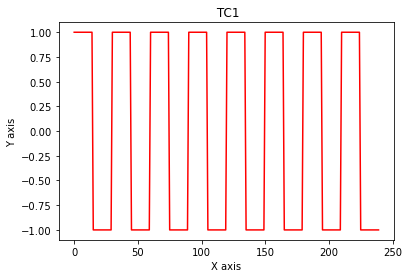

In [7]:
current_T1 = TC_generator(0,240, AV,IV, duration_of_ones)
current_T1 = np.array(current_T1)
standardized_current_T1= [(current_T1[i] - current_T1.mean())/ current_T1.std() for i in range(0, N)]
# data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC1")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T1, color ="red")
plt.show()

## T2

1


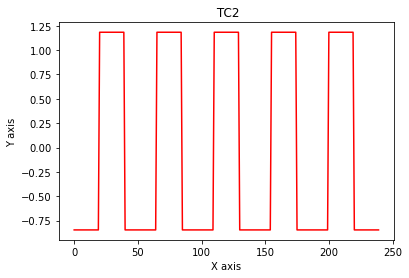

In [8]:
scaler = StandardScaler()
current_T2 = TC_generator(1, N, AV,IV, duration_of_ones)
current_T2 = np.array(current_T2)
standardized_current_T2=  (current_T2 - np.mean(current_T2)) / np.std(current_T2)
# standardized_current_T2 = scaler.fit_transform(np.array(current_T2))
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
print(current_T2[30])
plt.title(" TC2")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T2, color ="red")
plt.show()

## T3

0


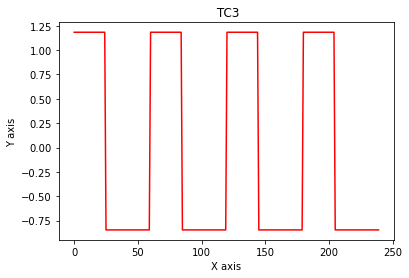

In [9]:
current_T3 = TC_generator(2, 240, AV,IV, duration_of_ones)
current_T3 = np.array(current_T3)
standardized_current_T3 = [(current_T3[i] - current_T3.mean())/ current_T3.std() for i in range(0, N)]
 # data to be plotted
print(current_T3[30])
x = [i for i in range(0, N)]
# plotting
plt.title(" TC3")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T3, color ="red")
plt.show()

## T4

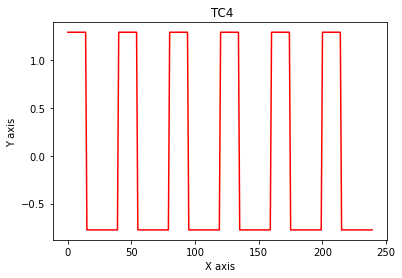

In [10]:
current_T4 = TC_generator(3, 240, AV,IV, duration_of_ones)
current_T4 = np.array(current_T4)
standardized_current_T4= [(current_T4[i] - current_T4.mean())/ current_T4.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC4")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T4, color ="red")
plt.show()

## T5

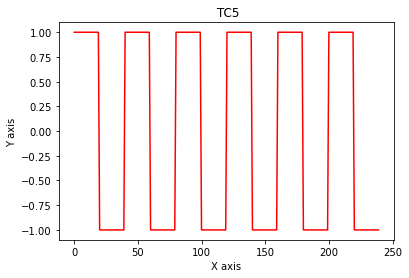

In [11]:
current_T5 = TC_generator(4, 240, AV,IV, duration_of_ones)
current_T5 = np.array(current_T5)
standardized_current_T5= [(current_T5[i] - current_T5.mean())/ current_T5.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC5")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T5, color ="red")
plt.show()

## T6

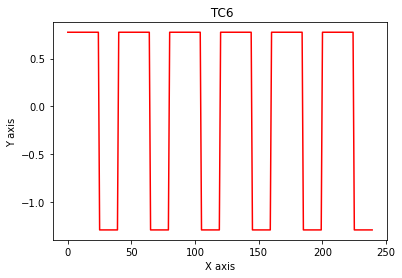

In [12]:
current_T6 = TC_generator(5, 240, AV,IV, duration_of_ones)
current_T6 = np.array(current_T6)
standardized_current_T6= [(current_T6[i] - current_T6.mean())/ current_T6.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC6")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T6, color ="red")
plt.show()

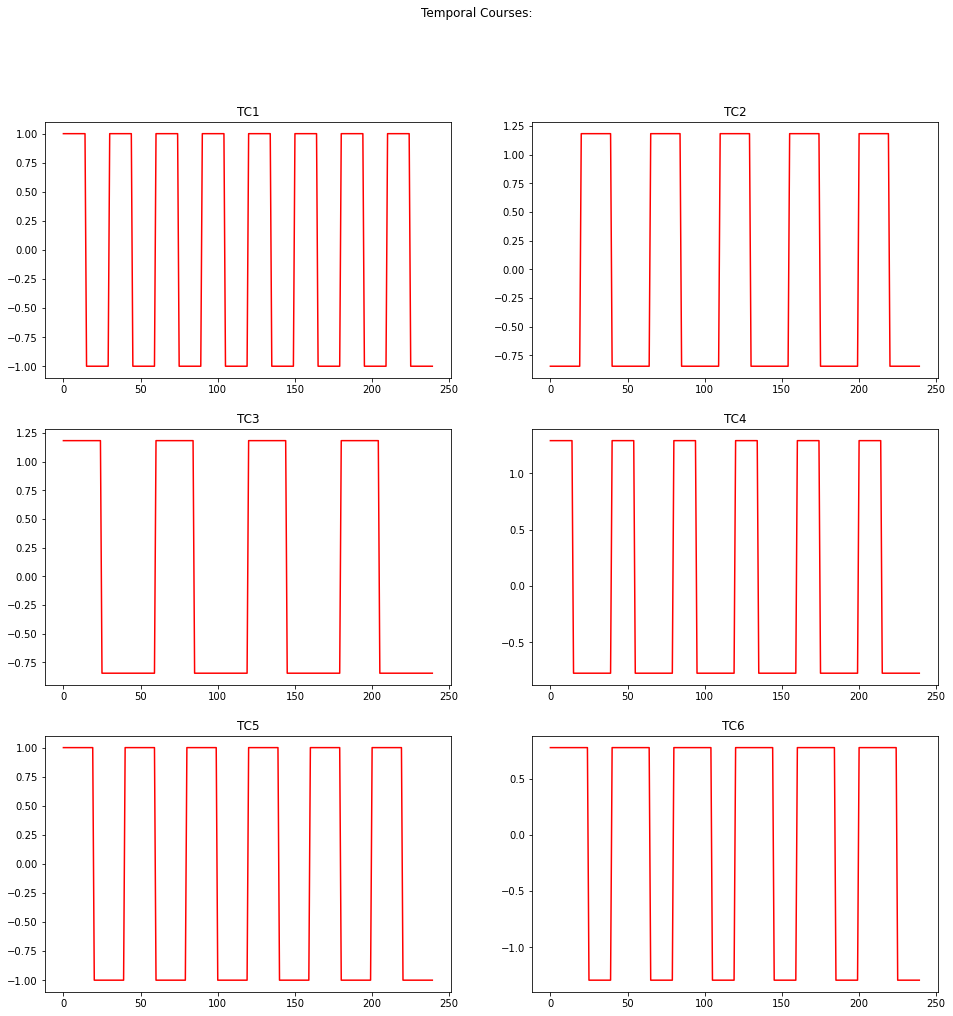

In [13]:
#plotting together
x = [i for i in range(0, 240)]
fig, ((ax1,ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (16,16))
fig.suptitle(r"Temporal Courses:")
ax1.set_title("TC1" )
ax1.plot(x, standardized_current_T1, color ="red")
ax2.set_title("TC2" )
ax2.plot(x, standardized_current_T2, color ="red")
ax3.set_title("TC3" )
ax3.plot(x, standardized_current_T3, color ="red")
ax4.set_title("TC4" )
ax4.plot(x, standardized_current_T4, color ="red")
ax5.set_title("TC5" )
ax5.plot(x, standardized_current_T5, color ="red")
ax6.set_title("TC6 " )
ax6.plot(x, standardized_current_T6, color ="red")
   
fig.show()

### For difference TCs, they might not center around the origin after dividing the l_2 norm, it makes the comparsions between different TCs harder.

# 1.2 

### Create the dataframe

In [14]:
data = {
    "T_1":  standardized_current_T1,
    "T_2":  standardized_current_T2,
    "T_3":  standardized_current_T3,
    "T_4":  standardized_current_T4,
    "T_5":  standardized_current_T5, 
    "T_6":  standardized_current_T6,
}

In [15]:
data_frame_time_courses = pd.DataFrame(data)
data_frame_time_courses.head(10)

,T_1,T_2,T_3,T_4,T_5,T_6
0,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
1,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
2,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
3,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
4,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
5,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
6,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
7,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
8,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
9,1.0,-0.845154,1.183216,1.290994,1.0,0.774597


In [16]:
result = data_frame_time_courses.corr()

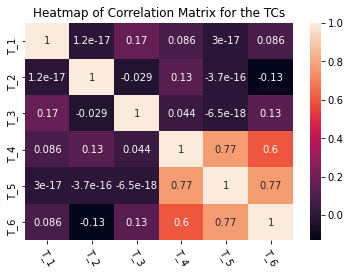

In [17]:
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=data_frame_time_courses.columns, xticklabels = data_frame_time_courses.columns)
plt.title("Heatmap of Correlation Matrix for the TCs")
plt.xticks(rotation=300)
plt.show()

### TCs with the same onset arrival vector are highly correlated, despite the fact that they have different duration of ones.

# 1.3

In [18]:
slice_1 = np.zeros((21,21))
slice_1[2-1:6,2-1:6] = 1

In [19]:
slice_2 = np.zeros((21,21))
slice_2[2-1:6,15-1:19] = 1

In [20]:
slice_3 = np.zeros((21,21))
slice_3[8-1:13,2-1:6] = 1

In [21]:
slice_4 = np.zeros((21,21))
slice_4[8-1:13,15-1:19] = 1

In [22]:
slice_5 = np.zeros((21,21))
slice_5[15-1:19,2-1:6] = 1

In [23]:
slice_6 = np.zeros((21,21))
slice_6[15-1:19,15-1:19] = 1

In [24]:
output_array = np.stack((slice_1.transpose(),slice_2.transpose(),slice_3.transpose(),slice_4.transpose(),slice_5.transpose(),slice_6.transpose(),), axis = 0)

In [25]:
output_array.shape

(6, 21, 21)

SM1


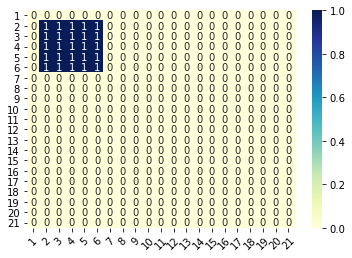

SM2


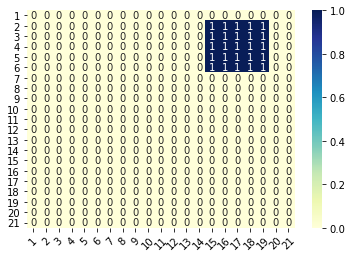

SM3


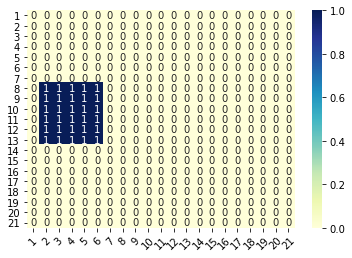

SM4


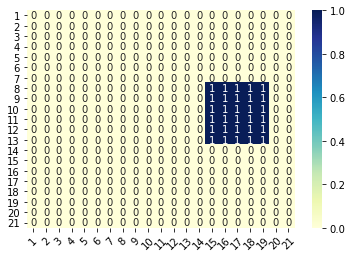

SM5


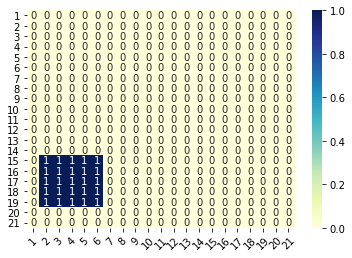

SM6


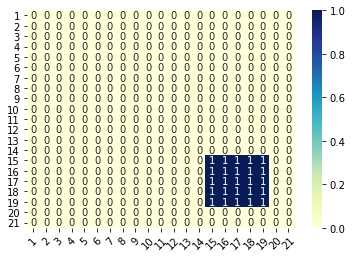

In [26]:
name_list = ['SM1','SM2','SM3','SM4','SM5','SM6']
slices = [slice_1,slice_2,slice_3,slice_4,slice_5,slice_6]
axis = [i+1 for i in range(0,21)]
for name, SM in zip(name_list, slices):
    print(name)
    heatmap  = sns.heatmap(SM, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu")
    plt.xticks(rotation=45)
    plt.show()

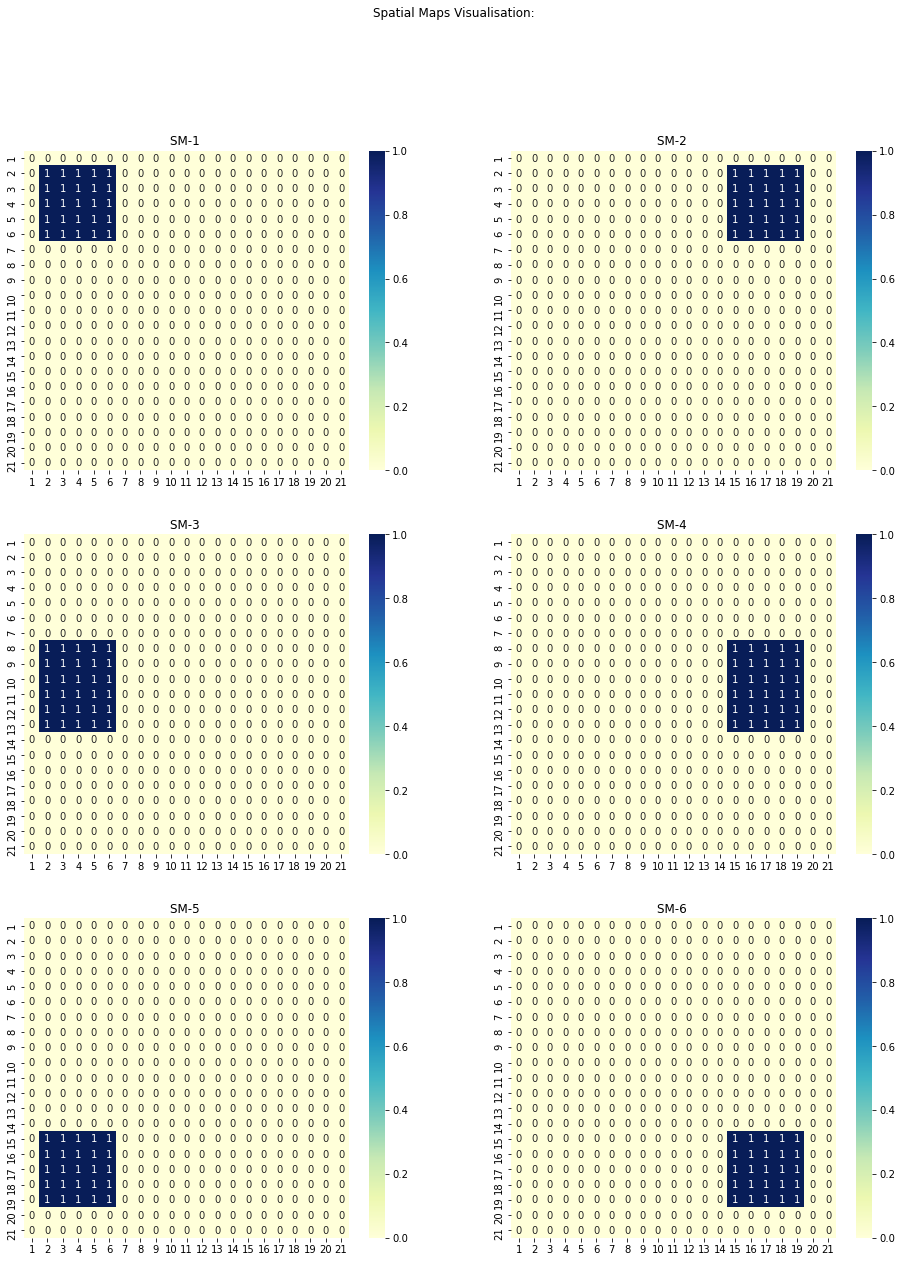

In [27]:
#plotting together
x = [i+1 for i in range(0,21)]
fig, ((ax1,ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (16,20))
fig.suptitle(r"Spatial Maps Visualisation: ")
ax1.set_title("SM-1 " )
sns.heatmap(slice_1, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax1)
ax2.set_title("SM-2 " )
sns.heatmap(slice_2, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax2)
ax3.set_title("SM-3 " )
sns.heatmap(slice_3, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax3)
ax4.set_title("SM-4 " )
sns.heatmap(slice_4, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax4)
ax5.set_title("SM-5 " )
sns.heatmap(slice_5, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax5)
ax6.set_title("SM-6 " )
sns.heatmap(slice_6, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax6)
   
fig.show()

In [28]:
SMs = np.reshape(output_array , (6,441))
print(SMs[0][25:35])

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
 SMs.shape

(6, 441)

In [30]:
result = np.corrcoef(SMs)
print(result)

[[ 1.         -0.06009615 -0.06623127 -0.06623127 -0.06009615 -0.06009615]
 [-0.06009615  1.         -0.06623127 -0.06623127 -0.06009615 -0.06009615]
 [-0.06623127 -0.06623127  1.         -0.0729927  -0.06623127 -0.06623127]
 [-0.06623127 -0.06623127 -0.0729927   1.         -0.06623127 -0.06623127]
 [-0.06009615 -0.06009615 -0.06623127 -0.06623127  1.         -0.06009615]
 [-0.06009615 -0.06009615 -0.06623127 -0.06623127 -0.06009615  1.        ]]


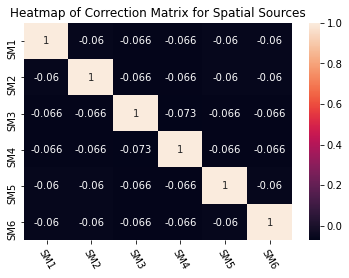

In [31]:
lst = ["SM1","SM2","SM3","SM4","SM5","SM6"]
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=lst, xticklabels = lst)
plt.title("Heatmap of Correction Matrix for Spatial Sources")
plt.xticks(rotation=300)
plt.show()

### From CM above, it seems to suggest that the SMs are independent of each other. All values on those slices lie in the same range of values, it either takes 0 or 1, so it is unnecessary to standardize them.

## 1.4

In [32]:
import math
noise_TC = np.random.normal(loc = 0.0, scale = 0.5, size = (6, 240)) 
noise_SM = np.random.normal(loc = 0.0, scale = math.sqrt(0.015), size = (6,441)) 

In [33]:
noise_TC.shape

(6, 240)

In [34]:
print(noise_TC)

[[ 0.47223243  0.75007475 -0.39084232 ... -0.35835848  0.2060427
   0.27941171]
 [-0.34527556  0.75752669  0.25891587 ...  0.03105771 -0.31446282
  -0.02724718]
 [-0.85107332  0.35153301 -0.86464804 ... -0.29661929  0.67519832
   0.05013377]
 [-0.6386578  -0.27630889  0.2791762  ... -0.2187547  -0.20903901
  -0.39392027]
 [ 0.53342978  0.35860665 -0.19544534 ... -0.2243187   0.77538238
  -0.13361163]
 [-0.69523645  0.92142608  0.10107039 ... -0.1151664  -0.53921351
   0.71481781]]


In [35]:
noise_SM.shape

(6, 441)

## For TC noise:

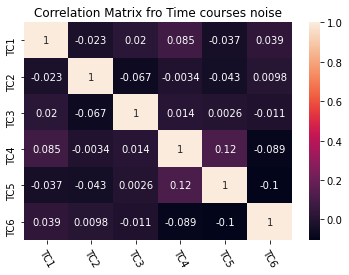

In [36]:
result = np.corrcoef(noise_TC)
TC = ["TC1","TC2","TC3","TC4","TC5","TC6"]
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True, yticklabels=TC, xticklabels = TC)
plt.title("Correlation Matrix fro Time courses noise")
plt.xticks(rotation=300)
plt.show()

## The noise sources are not correlated

## The histograms of TC noise sources:

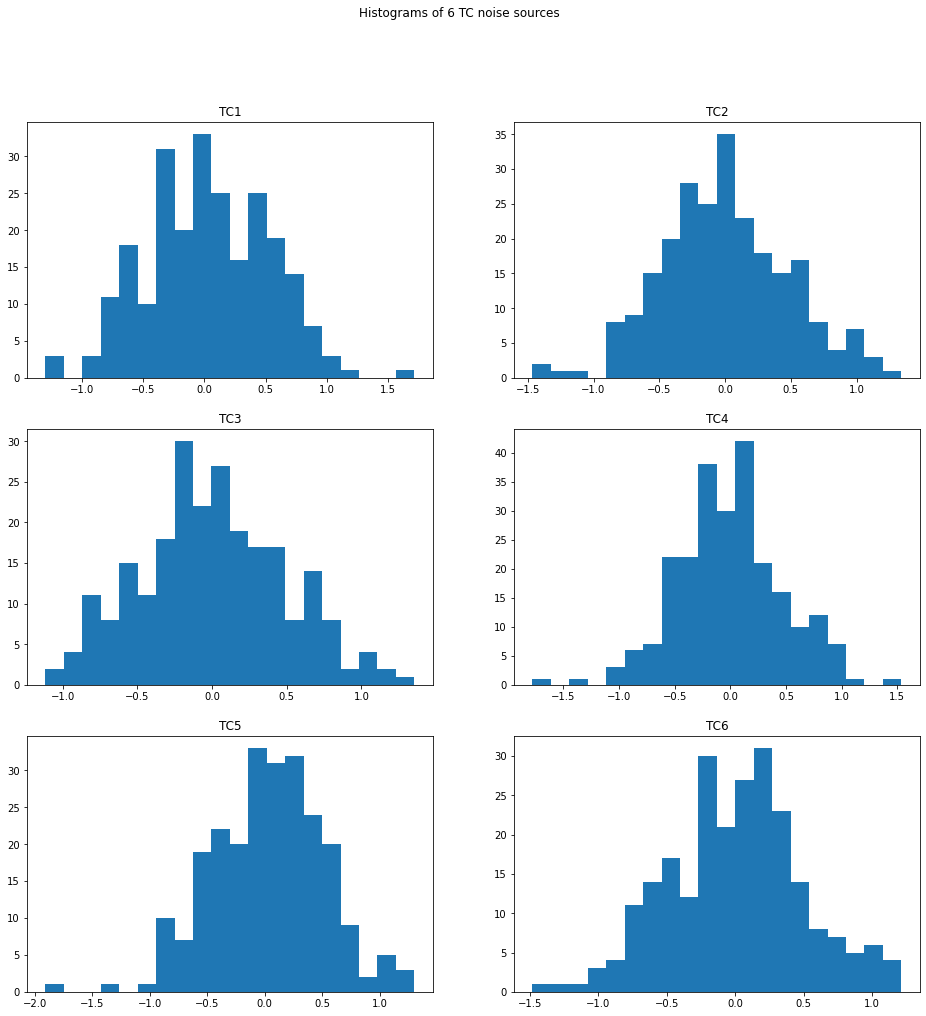

In [37]:
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
fig, ((ax1,ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (16,16))
fig.suptitle(r"Histograms of 6 TC noise sources")
ax1.set_title(name_list[0])
ax1.hist(noise_TC[0],bins = 20)
ax2.set_title(name_list[1])
ax2.hist(noise_TC[1],bins = 20)
ax3.set_title(name_list[2])
ax3.hist(noise_TC[2],bins = 20)
ax4.set_title(name_list[3])
ax4.hist(noise_TC[3],bins = 20)
ax5.set_title(name_list[4])
ax5.hist(noise_TC[4],bins = 20)
ax6.set_title(name_list[5])
ax6.hist(noise_TC[5],bins = 20)
fig.show()


### Yes, the mean and standard deviations are roughly following the normal distribution with parameters specified.

## For Spatial Maps noise:

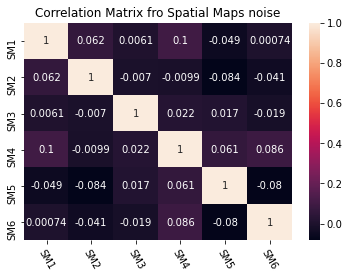

In [38]:
result = np.corrcoef(noise_SM)
SM = ["SM1","SM2","SM3","SM4","SM5","SM6"]
result_matrix = np.array(result)
plt.title("Correlation Matrix fro Spatial Maps noise")
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=SM, xticklabels = SM)
plt.xticks(rotation=300)
plt.show()

## The noise sources are not correlated

## The histograms of SM noise sources:


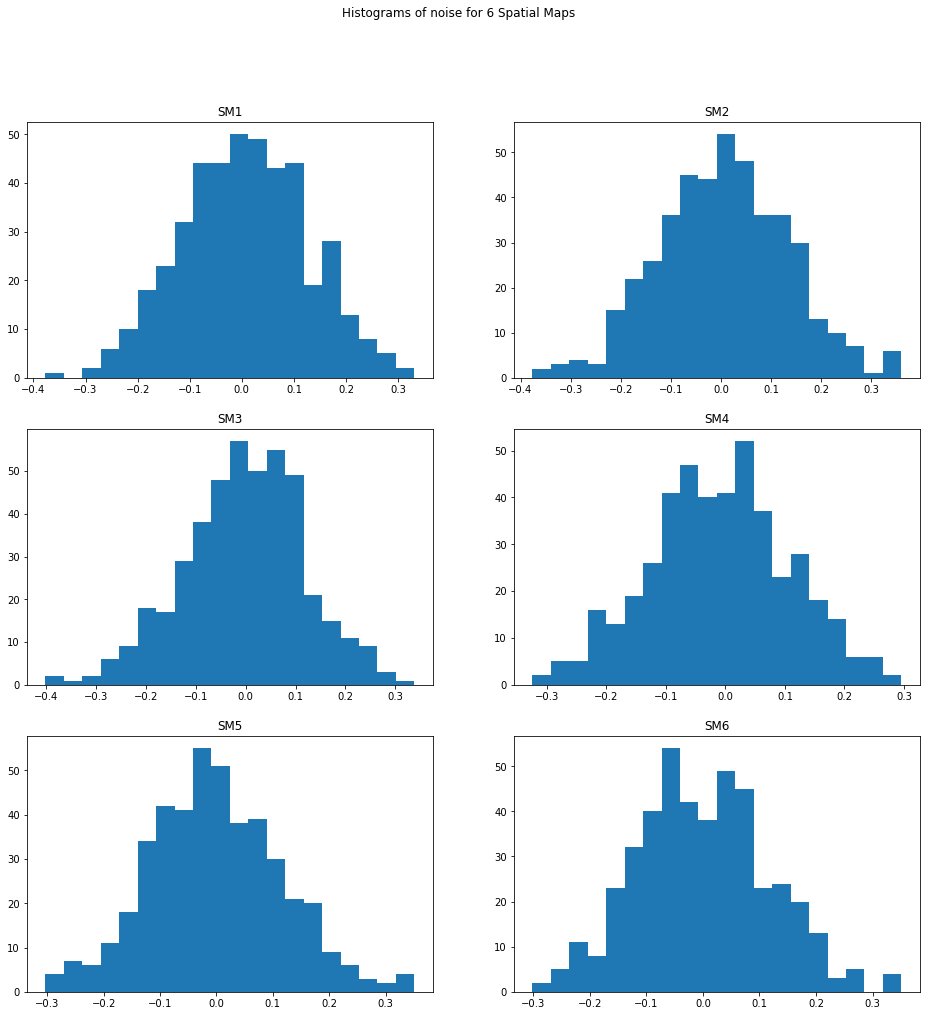

In [39]:
name_list  = ["SM1","SM2","SM3","SM4","SM5","SM6"]
fig, ((ax1,ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (16,16))
fig.suptitle(r"Histograms of noise for 6 Spatial Maps")
ax1.set_title(name_list[0])
ax1.hist(noise_SM[0],bins = 20)
ax2.set_title(name_list[1])
ax2.hist(noise_SM[1],bins = 20)
ax3.set_title(name_list[2])
ax3.hist(noise_SM[2],bins = 20)
ax4.set_title(name_list[3])
ax4.hist(noise_SM[3],bins = 20)
ax5.set_title(name_list[4])
ax5.hist(noise_SM[4],bins = 20)
ax6.set_title(name_list[5])
ax6.hist(noise_SM[5],bins = 20)
fig.show()


# Plot the entire noise dataset for temporal and Spatial sources

Text(0.5, 1.0, 'Histogram of Noise data for Spatial Maps with \n Sample mean: -0.0007065503069398831\n Sample Standard deviation: 0.12040100085578237')

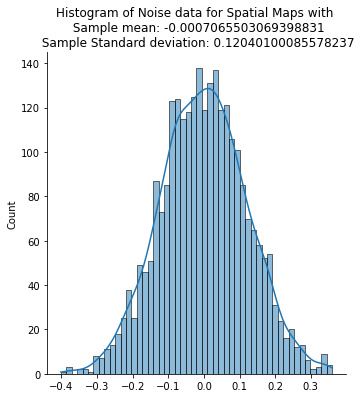

In [40]:
data  = np.reshape(noise_SM, (1,2646))[0]
plot = sns.displot(data, bins = 50, kde = True)
plt.title("Histogram of Noise data for Spatial Maps with \n Sample mean: "+ str(data.mean()) + "\n Sample Standard deviation: " + str(data.std()))

Text(0.5, 1.0, 'Histogram of Noise data for Time Courses  with \n Sample mean: 0.011820183402743973\n Sample Standard deviation: 0.4868011112257288')

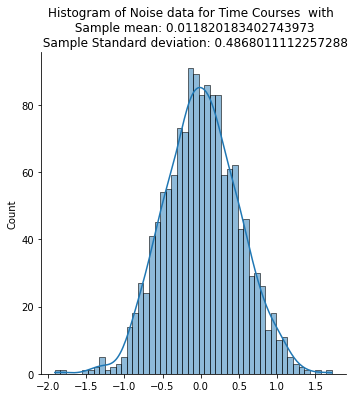

In [41]:
data  = np.reshape(noise_TC, (1,1440))[0]
plot2 = sns.displot(data, bins = 50, kde = True)
plt.title("Histogram of Noise data for Time Courses  with \n Sample mean: "+ str(data.mean()) + "\n Sample Standard deviation: " + str(data.std()))

### Yes, the mean and standard deviations are roughly following the normal distribution with parameters specified.

In [42]:
product = np.matmul(noise_TC.transpose(),noise_SM)

## Correlation between $\Gamma_s\Gamma_t$ aross $V$ number of variables

In [43]:
product = np.matmul(noise_TC.transpose(),noise_SM)
print(product.shape)

(240, 441)


In [44]:
import time
rng = np.random.default_rng(int(time.time()))
index_random_selected = rng.integers(low=0, high=441,size = 20)
print(index_random_selected)

[355 105 319 168 355 347 235  80 171 371 364 206 189 106 187 237 151 363
 271 418]


## We choose the random $\Gamma_s \Gamma_t$ across 20 variables

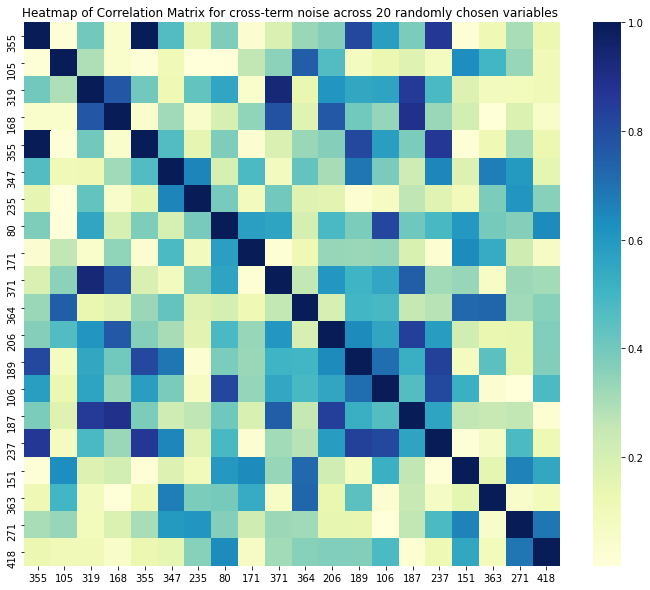

In [45]:
plot = plt.figure(figsize=(12,10))
result = np.corrcoef(np.array(product.T[index_random_selected]))
plt.title("Heatmap of Correlation Matrix for cross-term noise across 20 randomly chosen variables ")
heatmap  = sns.heatmap(abs(result), annot=False,yticklabels=index_random_selected, xticklabels = index_random_selected,cmap="YlGnBu" )

## From the Heatmap of the correlation matrix, we can see that in general $\Gamma_s\Gamma_t$ are moderately correlated either negatively or positively across the $V$ number of variables. This corresponds to the fact that $\Gamma_s\Gamma_t$ is generated by the matrix multiplication between $\Gamma_s$ and $\Gamma_t$

## 1.5

In [46]:
data_frame_time_courses.shape

(240, 6)

In [47]:
noise_TC.transpose().shape

(240, 6)

In [48]:
print(SMs.shape)
print(noise_SM.shape)

(6, 441)
(6, 441)


In [49]:
X = np.matmul((data_frame_time_courses + noise_TC.transpose()),(SMs + noise_SM)) \
#- np.matmul(data_frame_time_courses, noise_SM) - np.matmul(noise_TC.transpose(), SMs) 
print(X.shape)

(240, 441)


# Random Time Series Visualization with 105 random time series choosen

In [50]:
import time
rng = np.random.default_rng(int(time.time()))
index_random_selected = rng.integers(low=0, high=441,size = 105)
print(index_random_selected)

[350 233 405 277   9 227 266 273 361 171 155  67 101  40 108 361 127  98
  52  15 344 411 285 147 328  84 140 205 366   0 136 331  75 157 354 206
 405 373 212 219 260 418  48 138 214 390 302 335  74 354  76 390 272 332
 186 418 126 224 363 351  19   5 417 142 359  25 337 211  71  87 419 248
 182 219 208  47  27 345 121 318  83 171 329 269 108 226  50 114 251 353
 292 324 100 123 258 197 274 431 128   3 357  81 172  79 344]


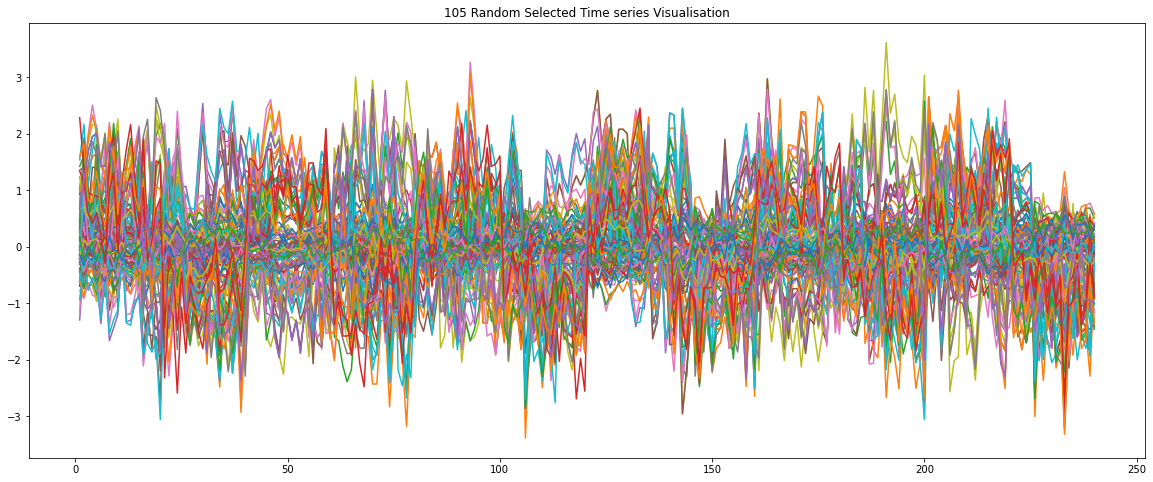

In [51]:
x  =[ i + 1 for i in range(0,240)]
fig = plt.figure(figsize = (20,8))
plt.title("105 Random Selected Time series Visualisation")
plot = plt.plot(x, X[index_random_selected],label = ["X " +str(i) for i in index_random_selected])

# Visualization of variances in the histogram for 441 variables

In [52]:
std_441 = np.array(X.describe())[2]


### Variance

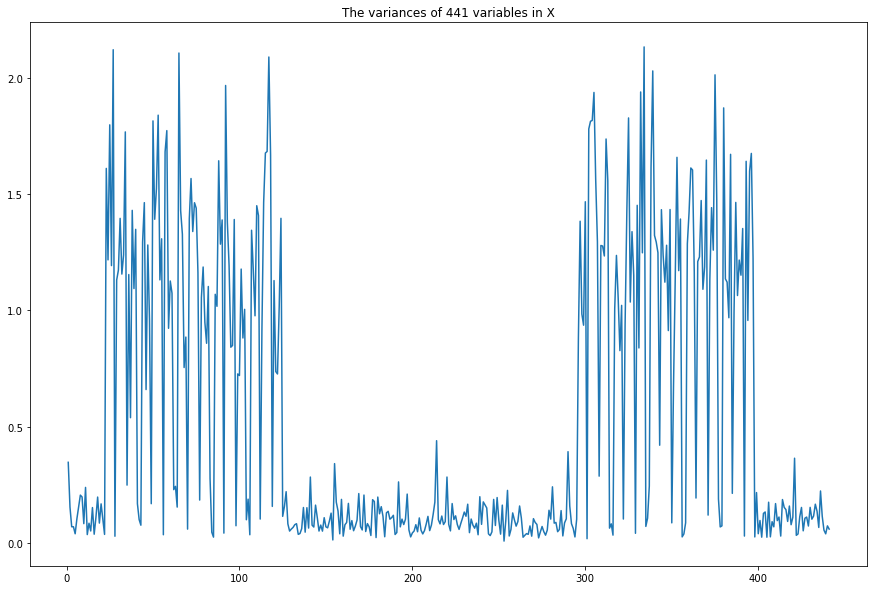

In [53]:
x = [i + 1 for i in range(441)]
plot = plt.figure(figsize=(15,10))
plt.title("The variances of 441 variables in X")
var_441 =  [ i*i  for i in std_441]
plt.plot(x, var_441)

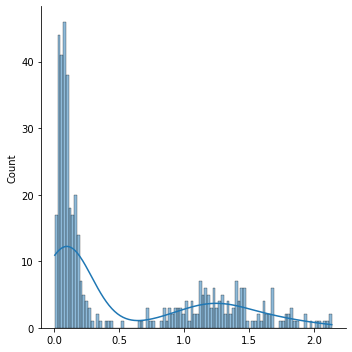

In [54]:
var_441 =  [ i*i  for i in std_441]
sns.displot(var_441, bins = 100, kde = True)

### Standard Deviation

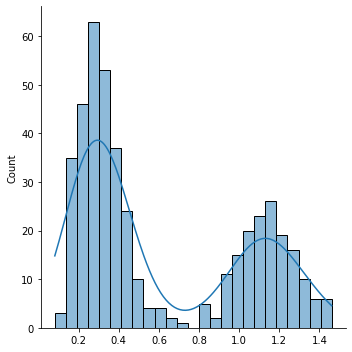

In [55]:
sns.displot(std_441, bins = 25, kde = True)

### These terms can exist when creating the synthetic dataset, but when we are trying to fit the model described in the equation (1), we ignore the existence of these cross terms and the effect of these terms are fitted within $A$ in the model, this can be shown in the later plots of retrieved spatial maps where the noise data are very conspicuous. 


### From the plot of the variances of 441 variables, we can see that the empirical distribution is bimodal, which is correspond to the number of noise terms we add when creating the synthetic dataset.

## Standardizing the dataset X

In [56]:
Standardized_X  = X.copy()
for column in X.columns:
    Standardized_X[column] = (X[column] - X[column].mean())/X[column].std()


# Question 2

## 2.1

In [57]:
DTD = np.matmul(data_frame_time_courses.transpose(),data_frame_time_courses)
DT_standardised_X = np.matmul(data_frame_time_courses.transpose(),Standardized_X)

In [58]:
Standardized_X.shape

(240, 441)

In [59]:
DTD

,0,1,2,3,4,5
T_1,2.400000e+02,1.776357e-15,4.056740e+01,20.655911,0.000000e+00,20.655911
T_2,1.776357e-15,2.400000e+02,-6.857143e+00,31.423376,4.218847e-15,-31.423376
T_3,4.056740e+01,-6.857143e+00,2.400000e+02,10.474459,-2.886580e-15,31.423376
T_4,2.065591e+01,3.142338e+01,1.047446e+01,240.000000,1.859032e+02,144.000000
T_5,0.000000e+00,4.218847e-15,-2.886580e-15,185.903201,2.400000e+02,185.903201
T_6,2.065591e+01,-3.142338e+01,3.142338e+01,144.000000,1.859032e+02,240.000000


In [60]:
A_LSR = np.matmul(np.linalg.inv(DTD), DT_standardised_X)

In [61]:
A_LSR = abs(A_LSR)

In [62]:
D_LSR  = np.matmul(Standardized_X,A_LSR.transpose())

In [63]:
D_LSR

,0,1,2,3,4,5
0,34.306114,-15.372088,11.458552,19.445491,35.642801,3.496535
1,47.910479,11.283076,39.426191,34.320654,40.417614,45.730279
2,16.573610,-7.886225,5.917781,35.599567,19.521485,19.006904
3,28.611783,-3.489325,6.468417,43.928636,17.306688,6.186186
4,41.260879,3.899593,35.089446,46.298811,29.343009,43.029222
...,...,...,...,...,...,...
235,-44.688400,-29.551698,-30.475606,-23.613423,-19.683432,-31.236152
236,-39.821668,-26.778801,-32.620677,-14.804162,-42.371109,-41.756881
237,-41.051425,-27.021491,-33.632116,-33.530502,-38.336812,-40.519639
238,-28.897460,-31.705202,-12.340655,-28.764913,-13.752325,-45.766574


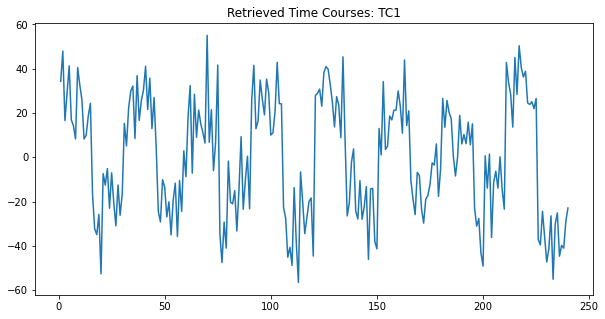

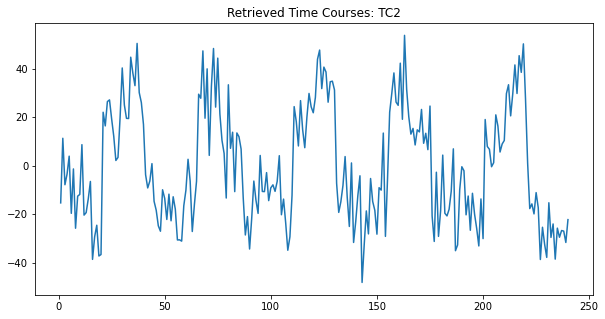

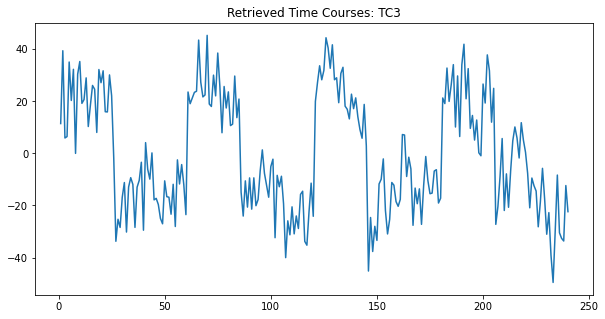

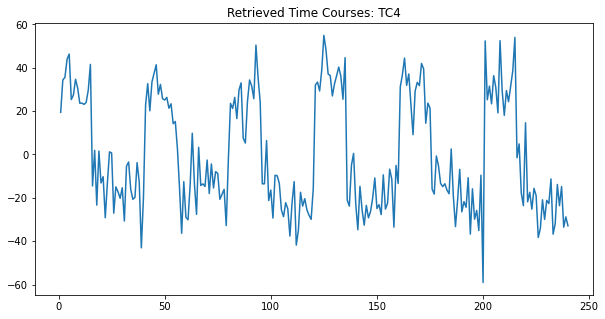

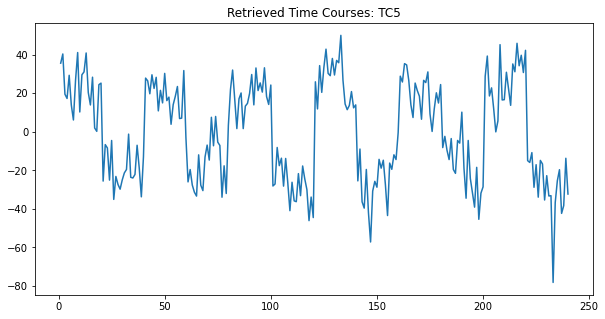

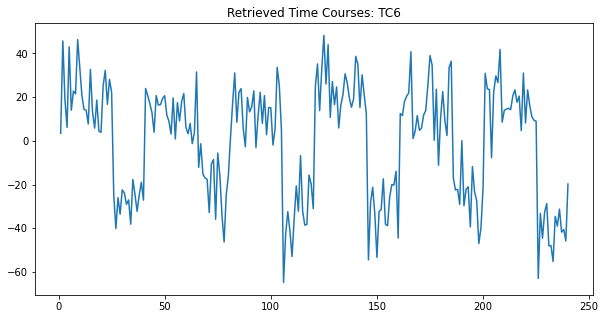

In [64]:
x = [i+1 for i in range(0,240)]
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
for name, index in zip(name_list, [i for i in range(6)]):
    fig = plt.figure(figsize = (10,5))
    plt.title(r"Retrieved Time Courses: " + name)
    plot = plt.plot(x, D_LSR[index])
    

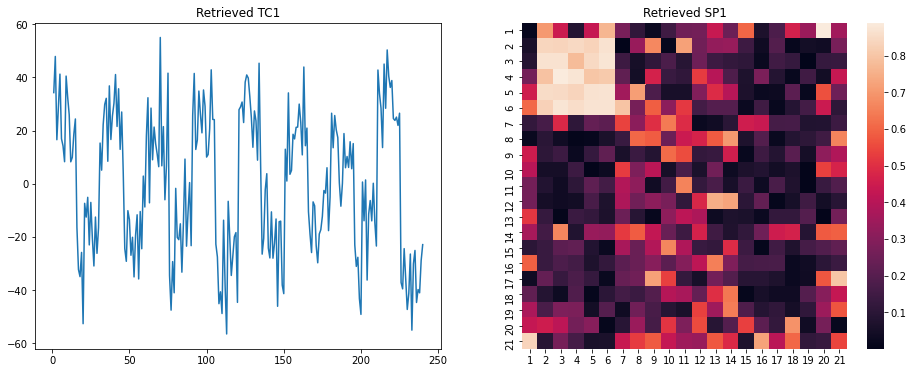

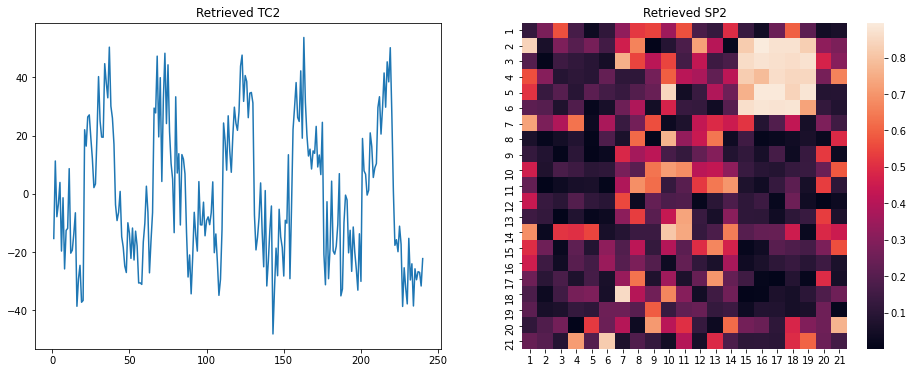

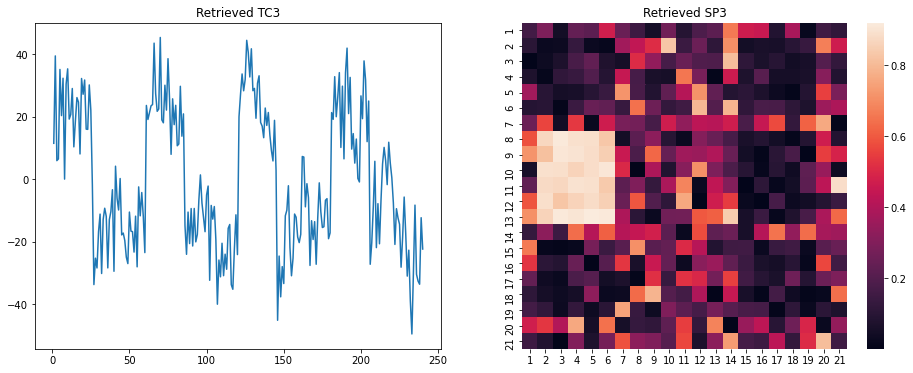

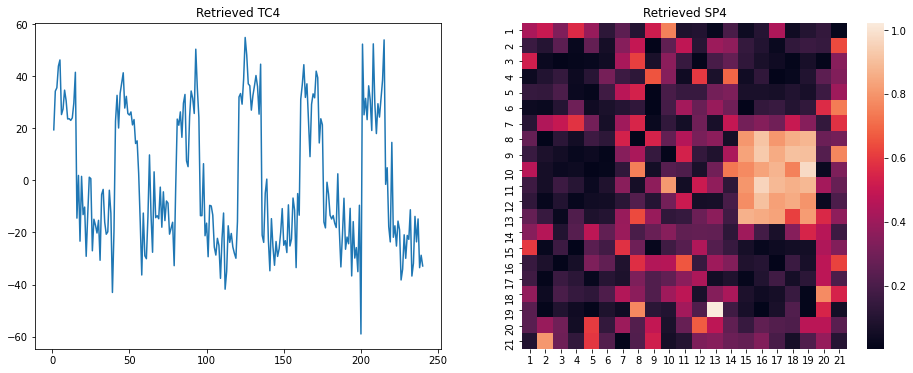

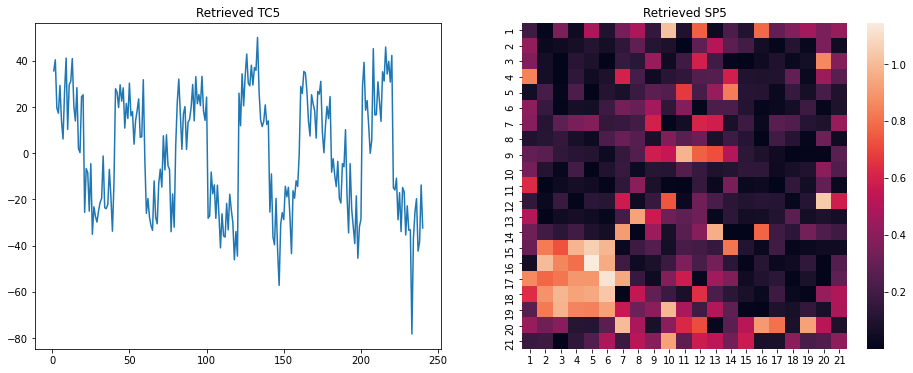

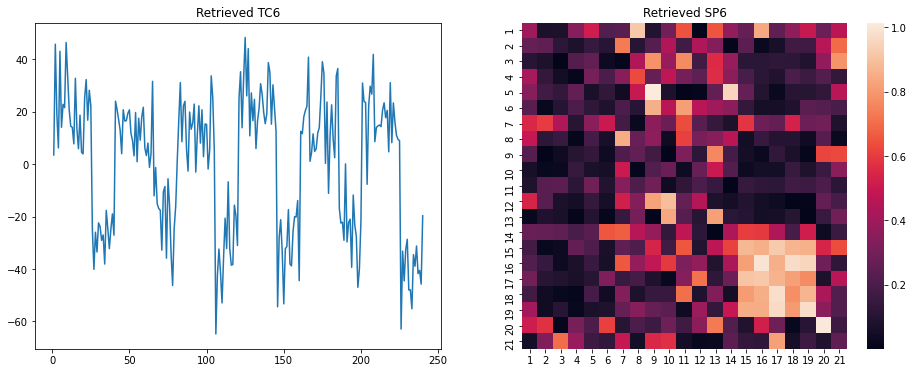

In [65]:
x = [i+1 for i in range(0,21)]
y  = [i+1 for i in range(0,240)]
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for name, index in zip(name_list, [i for i in range(6)]):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    #fig.suptitle(r"Using the LSR, Visualisation of Retrieved Spatial Maps and Temporal Courses")
    one_map = np.reshape(np.array(A_LSR.iloc[index,:]), (21,21)).transpose()
    ax2.set_title("Retrieved SP" + str(index+1))
    sns.heatmap(one_map,ax = ax2,yticklabels=x,xticklabels=x)
    ax1.plot(y, D_LSR[index])
    ax1.set_title("Retrieved TC" + str(index+1))
    fig.show()

## Scatter plot between 30th Columns of Standardized X and 3rd Column of D_LSR

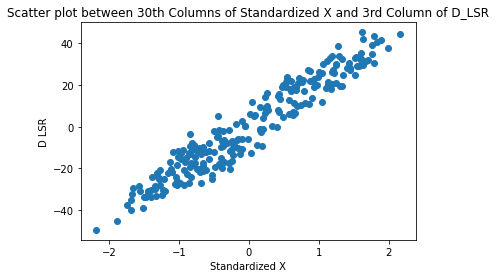

In [66]:
plt.title("Scatter plot between 30th Columns of Standardized X and 3rd Column of D_LSR")
plt.ylabel("D LSR")
plt.xlabel("Standardized X")
plot  = plt.scatter(Standardized_X[29],D_LSR[2])



In [67]:
np.corrcoef(Standardized_X[29],D_LSR[2])

array([[1.        , 0.96093602],
       [0.96093602, 1.        ]])

## Scatter plot between 30th Columns of Standardized X and 4rd Column of D_LSR

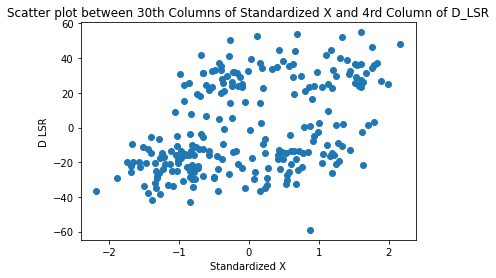

In [68]:
plt.title("Scatter plot between 30th Columns of Standardized X and 4rd Column of D_LSR")
plt.ylabel("D LSR")
plt.xlabel("Standardized X")
plt.scatter(Standardized_X[29],D_LSR[3])

In [69]:
np.corrcoef(Standardized_X[29],D_LSR[3])

array([[1.        , 0.43452118],
       [0.43452118, 1.        ]])

### Only the third temporal source contributed to the value of this element on the spatial map as only the third spatial map turn out to be 1 at this pixel value, which will preserve the effect from the temporal sources after taking the dot product in the matrix multiplication. 

## 2.2

In [70]:
A_LSR.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.016355,0.060005,0.083820,0.262233,0.453502,0.609265,0.120727,0.022279,0.451710,0.403913,...,0.097100,0.263316,0.591768,0.219340,0.138734,0.800573,0.429752,0.572984,0.019113,0.545678
1,0.126370,0.838202,0.198542,0.563709,0.512184,0.216423,0.729470,0.064649,0.125334,0.459818,...,0.030259,0.070039,0.449560,0.565874,0.066601,0.055780,0.252572,0.016619,0.767684,0.159985
2,0.161755,0.102700,0.003674,0.076969,0.368669,0.094692,0.254304,0.582761,0.715211,0.060060,...,0.143350,0.630291,0.365394,0.245591,0.157897,0.293481,0.643291,0.075283,0.341307,0.153934
3,0.430717,0.160318,0.524763,0.037862,0.146870,0.035071,0.111257,0.267932,0.156419,0.466414,...,0.206673,0.367560,0.162362,0.338056,0.620895,0.203217,0.542062,0.055035,0.239115,0.105459
4,0.188623,0.421906,0.373036,0.847361,0.057245,0.409889,0.384951,0.101632,0.292547,0.342499,...,0.587491,0.058846,0.188586,0.046812,0.248596,0.280248,0.494392,0.491653,0.086262,0.407210


In [71]:
# Generate the possible values for lambda
lambda_values = np.linspace(0,1,10000)*441

In [72]:
# storing the MSE results for differernt lambda values
identity_matrix = np.identity(6)
MSE_results = []
for values in lambda_values: 
    A_RR = np.matmul(np.linalg.inv(DTD + values*identity_matrix),DT_standardised_X)
    D_RR = np.matmul(Standardized_X,A_RR.transpose())
    X_hat = np.matmul(D_RR, A_RR)
    MSE = mean_squared_error(Standardized_X, X_hat)
    MSE_results.append(MSE)
MSE_results = np.array(MSE_results)

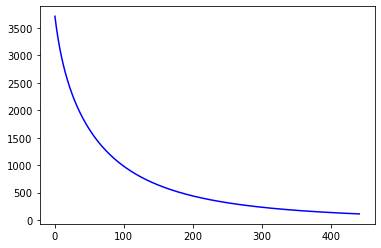

In [73]:
#Plot the graph of MSE against Lambda values.
plt.plot(lambda_values, MSE_results, color ="blue")
plt.show()

In [74]:
# Choose the optimal value that minimize the value of MSE
optimal_lambda = lambda_values[np.argmin(MSE_results)]
print(optimal_lambda)

441.0


In [75]:
# Generate the best A_RR and D_RR and X_hat
A_RR = np.matmul(np.linalg.inv(DTD + optimal_lambda*identity_matrix),DT_standardised_X)
D_RR = np.matmul(Standardized_X,A_RR.transpose())
X_hat = np.matmul(D_RR, A_RR)

In [76]:
corr_result_LSR = []
for i in range(6):
    correction = abs(np.corrcoef(D_LSR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_LSR.append(correction)
corr_result_LSR

[0.8536453330369005,
 0.8401859985983301,
 0.8618217757699675,
 0.9068260285787922,
 0.8747505510400742,
 0.8826920177253528]

In [77]:
corr_result_RR = []
for i in range(6):
    correction = abs(np.corrcoef(D_RR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_RR.append(correction)
corr_result_RR

[0.879513507230787,
 0.8880685859524393,
 0.9058798163160487,
 0.9036465682476209,
 0.9173995023098307,
 0.906464631678047]

In [78]:
print(sum(corr_result_LSR) < sum(corr_result_RR))


True


In [79]:
print("LSR:")
print(sum(corr_result_LSR))
print("RR:")
print(sum(corr_result_RR))

LSR:
5.219921704749417
RR:
5.400972611734774


# Plot the graphs of respective first vectors from $A_{RR}$ and $A_{LSR}$, when $\lambda = 1000$

In [80]:
A_RR_1000 = np.matmul(np.linalg.inv(DTD + 1000*441*identity_matrix),DT_standardised_X)
D_RR_1000 = np.matmul(Standardized_X,A_RR.transpose())
X_hat_1000 = np.matmul(D_RR, A_RR)

In [81]:
x = [i + 1 for i in range(0,21)]

<AxesSubplot:title={'center':'RR first Spatial map'}>

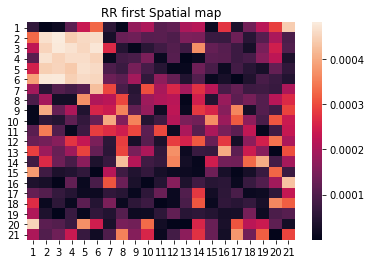

In [82]:
plt.title("RR first Spatial map")
sns.heatmap(abs(np.reshape(np.array(A_RR_1000.iloc[0,:]),(21,21))),yticklabels=x,xticklabels=x)

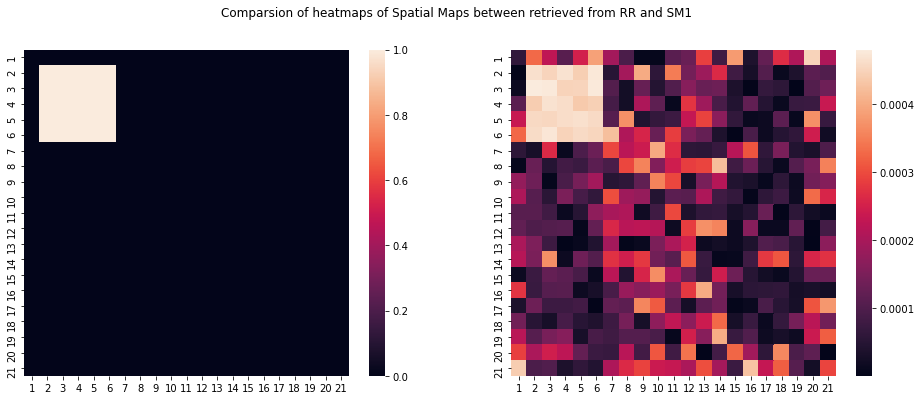

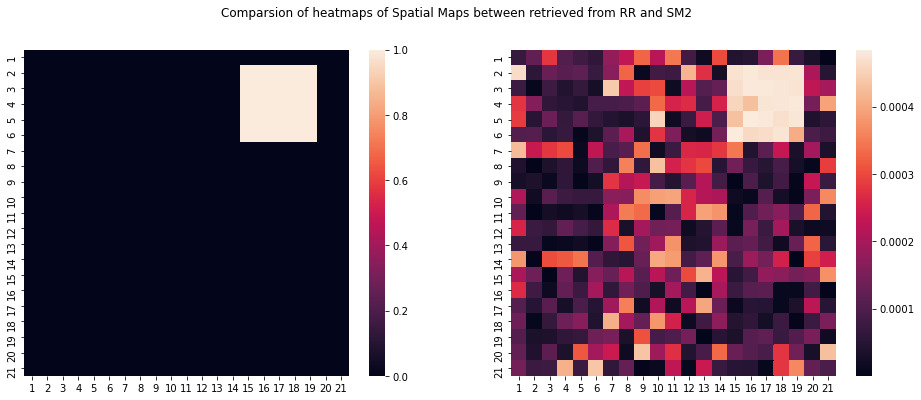

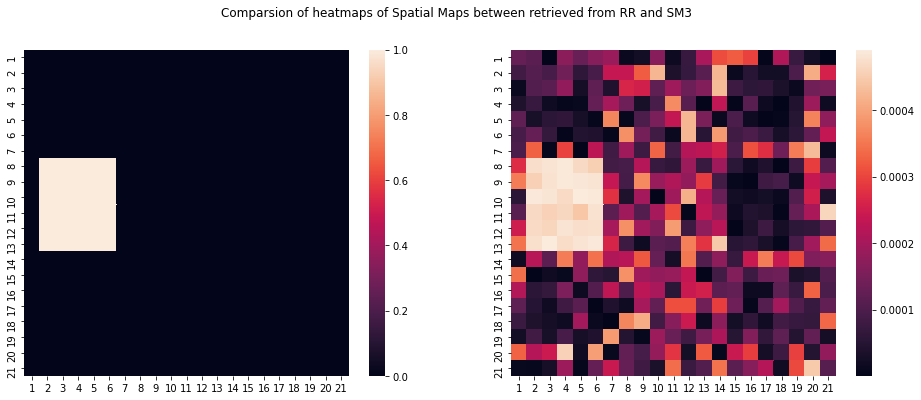

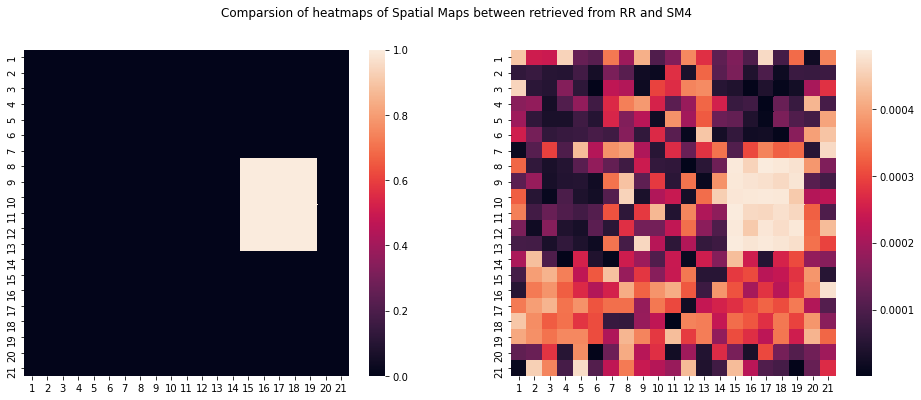

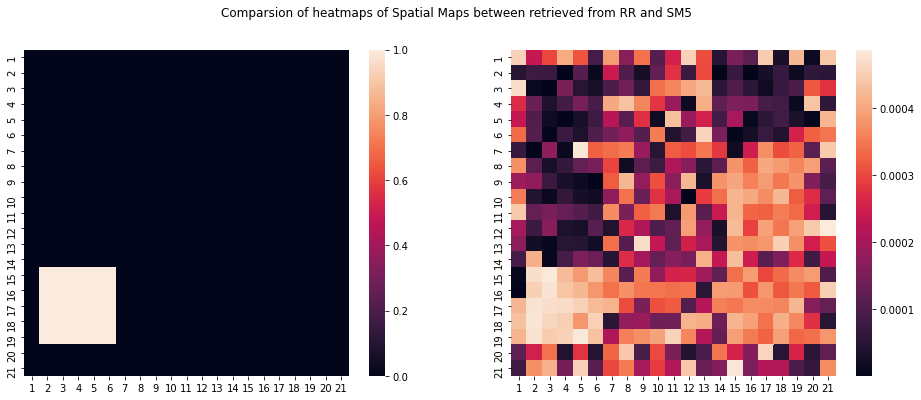

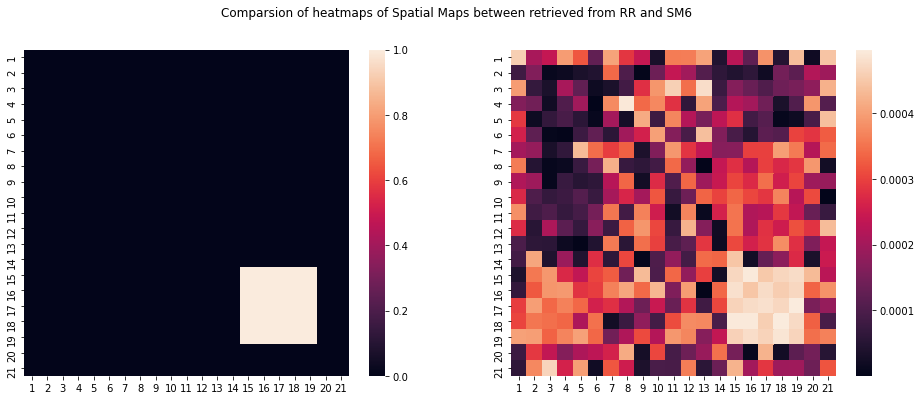

In [83]:
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    fig.suptitle("Comparsion of heatmaps of Spatial Maps between retrieved from RR and "  +name_list[i])
    sns.heatmap(np.reshape(SMs[i], (21,21)).transpose(),yticklabels=x,xticklabels=x,ax =ax1)
    sns.heatmap(abs(np.reshape(np.array(A_RR_1000.iloc[i,:]),(21,21))).transpose(),yticklabels=x,xticklabels=x,ax =ax2)
    fig.show()

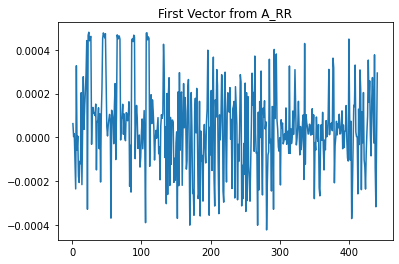

In [84]:
plt.title("First Vector from A_RR")
plt.plot([i+1 for i in range(441)], np.array(A_RR_1000.iloc[0,:]))

<AxesSubplot:title={'center':'LSR first Spatial map'}>

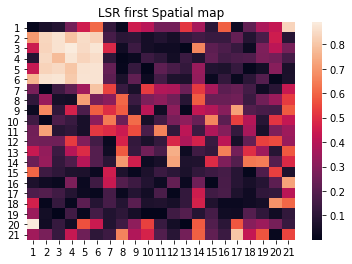

In [85]:
plt.title("LSR first Spatial map")
sns.heatmap(np.reshape(np.array(A_LSR.iloc[0,:]),(21,21)),yticklabels=x,xticklabels=x)

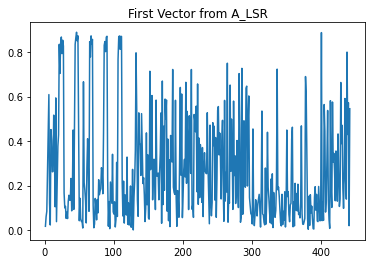

In [86]:
plt.title("First Vector from A_LSR")
plt.plot([i+1 for i in range(441)], np.array(A_LSR.iloc[0,:]))

## Yes, the pixel values of the spatial map from $A_{RR}$ are shrinking to zeros.

## 2.3

In [87]:
from sklearn import linear_model
rou_values = np.linspace(0,1,21)
print(rou_values)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [88]:
MSE_LR_results = []
A_LR_results = []
D_LR_results = []
for i in rou_values:
    clf = linear_model.Lasso(alpha=i)
    clf.fit(data_frame_time_courses, Standardized_X)
    A_LR = clf.coef_.transpose()
    D_LR = np.matmul(Standardized_X,A_LR.transpose())
    MSE = mean_squared_error(Standardized_X, np.matmul(D_LR,A_LR))
    A_LR_results.append(A_LR)
    D_LR_results.append(D_LR)
    MSE_LR_results.append(MSE)
    

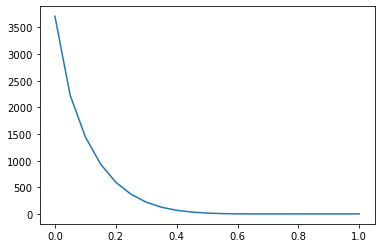

In [89]:
plt.plot(rou_values, MSE_LR_results)

In [90]:
MSE_LR_10results =[]
for k in range(10):
    noise_TC = np.random.normal(loc = 0.0, scale = 0.5, size = (6, 240)) 
    noise_SM = np.random.normal(loc = 0.0, scale = math.sqrt(0.015), size = (6,441)) 
    X = np.matmul((data_frame_time_courses + noise_TC.transpose()),(SMs + noise_SM))
    for column in X.columns:
        Standardized_X[column] = (X[column] - X[column].mean())/X[column].std()
    
    MSE_LR_results = []
    for i in rou_values:
        clf = linear_model.Lasso(alpha=i)
        clf.fit(data_frame_time_courses, Standardized_X)
        A_LR = clf.coef_.transpose()
        D_LR = np.matmul(Standardized_X,A_LR.transpose())
        MSE = mean_squared_error(Standardized_X, np.matmul(D_LR,A_LR))
        A_LR_results.append(A_LR)
        D_LR_results.append(D_LR)
        MSE_LR_results.append(MSE)
    MSE_LR_10results.append(MSE_LR_results)

    

In [91]:
MSE_LR_10results_T = np.array(MSE_LR_10results).transpose()
  

In [92]:
Mean_MSE_results_for_10 = []
for i in range(21):
    Mean_MSE_results_for_10.append(MSE_LR_10results_T[i].mean())
 

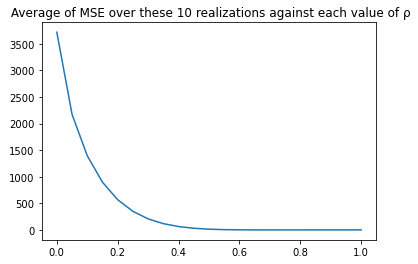

In [93]:
plt.title(" Average of MSE over these 10 realizations against each value of ρ")
plt.plot(rou_values,Mean_MSE_results_for_10)

# Too see the turning point much clear, we apply the log transformation here

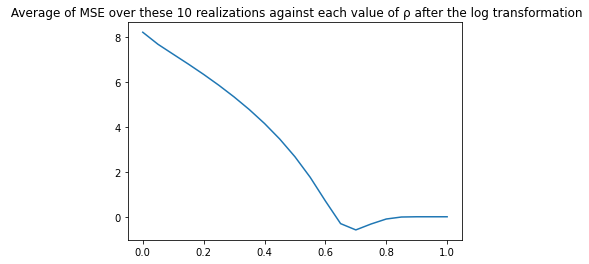

In [94]:
plt.title(" Average of MSE over these 10 realizations against each value of ρ after the log transformation")
plt.plot(rou_values,[math.log(i) for i in Mean_MSE_results_for_10])

In [95]:
optimal_rou_value = rou_values[np.argmin(Mean_MSE_results_for_10)]
print(optimal_rou_value)

0.7000000000000001


### The $\rho$ value found in this case is 0.7000 which minimize the MSE after 10 realizations, this result, in general, should be quite reliable as it is obtained upon 10 times of different realizations of noise sources.

## 2.4

In [96]:
clf = linear_model.Lasso(alpha=optimal_rou_value)
clf.fit(data_frame_time_courses, Standardized_X)
A_LR = clf.coef_.transpose()
D_LR = np.matmul(Standardized_X,A_LR.transpose())

In [97]:
print(A_LR.shape)
print(D_LR.shape)

(6, 441)
(240, 6)


## Estimate the correlation vectors

### For RR:

In [98]:
corr_result_RR_D = []
for i in range(6):
    correction = abs(np.corrcoef(D_RR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_RR_D.append(correction)
corr_result_RR_D

[0.879513507230787,
 0.8880685859524393,
 0.9058798163160487,
 0.9036465682476209,
 0.9173995023098307,
 0.906464631678047]

In [99]:
corr_result_RR_A = []
for i in range(6):
    correction = abs(np.corrcoef(A_RR.iloc[i,:], np.array(SMs[i]))[1,0])
    corr_result_RR_A.append(correction)
corr_result_RR_A

[0.5286532419238108,
 0.5254854752335367,
 0.5687605828650185,
 0.4924926258953625,
 0.3972050565706322,
 0.4467545093403431]

### For LR:

In [100]:
corr_result_LR_D = []
for i in range(6):
    correction = abs(np.corrcoef(D_LR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_LR_D.append(correction)
corr_result_LR_D

[0.9052680081234741,
 0.8861359090159475,
 0.898982246186717,
 0.914105301891053,
 0.9162179790780945,
 0.919703726060475]

In [101]:
corr_result_LR_A = []
for i in range(6):
    correction = abs(np.corrcoef(A_LR[i], np.array(SMs[i]))[1,0])
    corr_result_LR_A.append(correction)
corr_result_LR_A

[0.9279660007411022,
 0.9072390963208995,
 0.9154147415415892,
 0.8747922936926197,
 0.7945869637481356,
 0.8113920952405735]

In [102]:
print(sum(corr_result_LR_D) > sum(corr_result_RR_D))

True


In [103]:
print(sum(corr_result_LR_A) > sum(corr_result_RR_A))

True


In [104]:
A_RR

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.024565,0.005981,0.021674,-0.072692,-0.152155,0.215590,-0.037017,0.002097,-0.132514,-0.139267,...,-0.040663,0.104675,0.189182,0.081039,-0.031419,0.254341,-0.107485,-0.197150,-0.001932,0.194076
1,-0.043778,0.296789,0.053339,0.181882,0.183968,-0.068344,-0.269744,0.027728,0.025127,-0.140044,...,0.010716,-0.030778,0.158721,0.233154,-0.005316,0.030949,0.097063,0.011388,-0.272670,0.060759
2,0.070334,-0.050972,0.000926,0.034907,0.098036,0.053957,-0.068289,0.186741,0.234802,-0.036414,...,-0.054996,0.219879,-0.111253,0.072982,0.054977,-0.090130,0.220921,0.002453,0.115419,0.069119
3,0.192381,0.029491,-0.212472,-0.068738,-0.074587,-0.099791,-0.005062,-0.139838,0.029478,0.156518,...,-0.178156,-0.139065,-0.067982,0.061624,0.225960,-0.044807,0.098694,-0.130244,-0.098163,-0.107972
4,0.186673,0.039931,-0.203736,-0.143651,-0.096247,-0.158450,0.013830,-0.158597,0.085652,0.161116,...,-0.217661,-0.133884,-0.104545,-0.042393,0.189694,-0.042405,-0.004957,-0.169269,-0.047467,-0.173086
5,0.200577,-0.054212,-0.154701,-0.043980,-0.137697,-0.116091,0.120187,-0.168427,0.105040,0.098271,...,-0.181188,-0.104719,-0.110779,-0.144905,0.149042,-0.101612,0.038553,-0.157084,-0.017615,-0.142762


In [105]:
D_RR

,0,1,2,3,4,5
0,30.304807,-23.455088,7.686818,22.059431,28.088199,23.466876
1,41.254272,-2.980242,37.386265,38.627549,38.910261,46.997731
2,14.644029,-11.385564,10.529865,36.423973,32.190685,32.439760
3,29.151418,-6.118999,12.665774,39.300121,28.212375,24.391436
4,38.005789,-7.578856,41.794014,46.890964,39.602977,48.943218
...,...,...,...,...,...,...
235,-40.366791,-19.223540,-26.783781,-22.284881,-15.762795,-22.392454
236,-30.505485,-14.622214,-19.389860,-22.612254,-29.703405,-33.226466
237,-34.962921,-17.260550,-27.408846,-37.074856,-34.828316,-37.095340
238,-21.466159,-23.867225,-7.691756,-30.618038,-24.205639,-33.110649


In [106]:
print(D_LR)

            0         1          2          3         4          5
0    4.119041 -1.895130   7.354135  10.624207  3.666437   5.168200
1    5.868435 -2.855299   7.045074   5.636181  2.910983   2.073044
2    3.986104 -1.325837   9.119160  10.354339  8.334171   5.365975
3    0.142728 -4.726851   0.504779   3.428537  9.521054   3.221270
4    4.050716 -3.475209  10.065436   4.831949  3.941089   2.982845
..        ...       ...        ...        ...       ...        ...
235 -2.557435 -0.634178  -4.394184  -7.144183 -4.791856  -5.377437
236 -4.861506  1.126431  -4.190383  -7.525169 -3.875871  -6.231092
237 -4.762521 -6.086674  -1.993059  -7.027072 -6.472003  -3.551591
238 -8.777139 -4.643132  -4.919749  -3.326710 -8.063321 -10.120062
239 -3.884943 -7.182855  -6.236752  -6.892447 -9.321140  -4.363183

[240 rows x 6 columns]


In [107]:
D_LR

,0,1,2,3,4,5
0,4.119041,-1.895130,7.354135,10.624207,3.666437,5.168200
1,5.868435,-2.855299,7.045074,5.636181,2.910983,2.073044
2,3.986104,-1.325837,9.119160,10.354339,8.334171,5.365975
3,0.142728,-4.726851,0.504779,3.428537,9.521054,3.221270
4,4.050716,-3.475209,10.065436,4.831949,3.941089,2.982845
...,...,...,...,...,...,...
235,-2.557435,-0.634178,-4.394184,-7.144183,-4.791856,-5.377437
236,-4.861506,1.126431,-4.190383,-7.525169,-3.875871,-6.231092
237,-4.762521,-6.086674,-1.993059,-7.027072,-6.472003,-3.551591
238,-8.777139,-4.643132,-4.919749,-3.326710,-8.063321,-10.120062


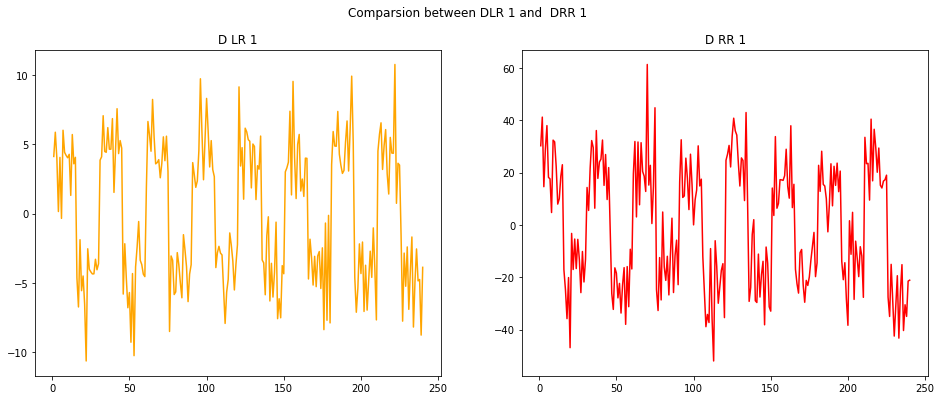

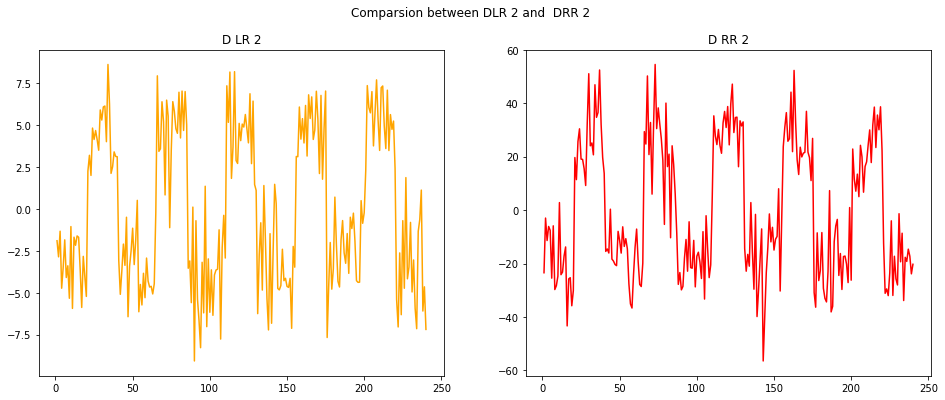

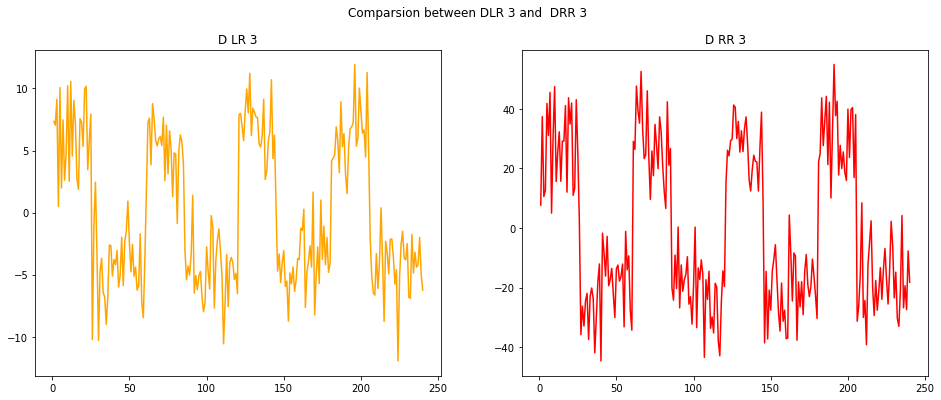

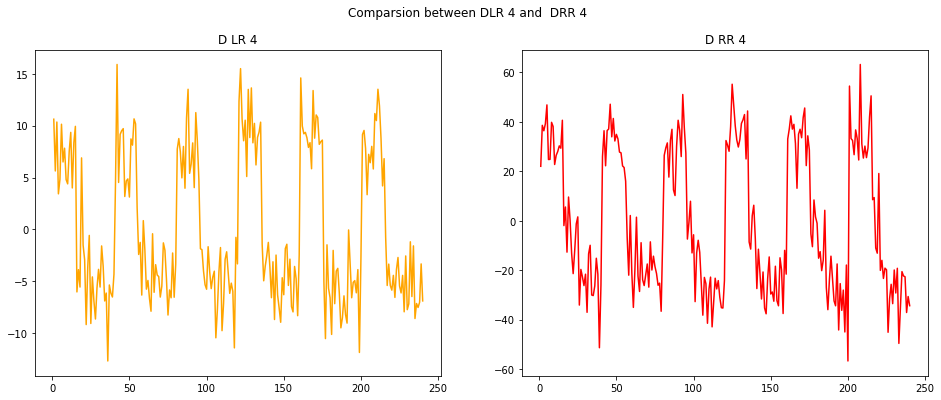

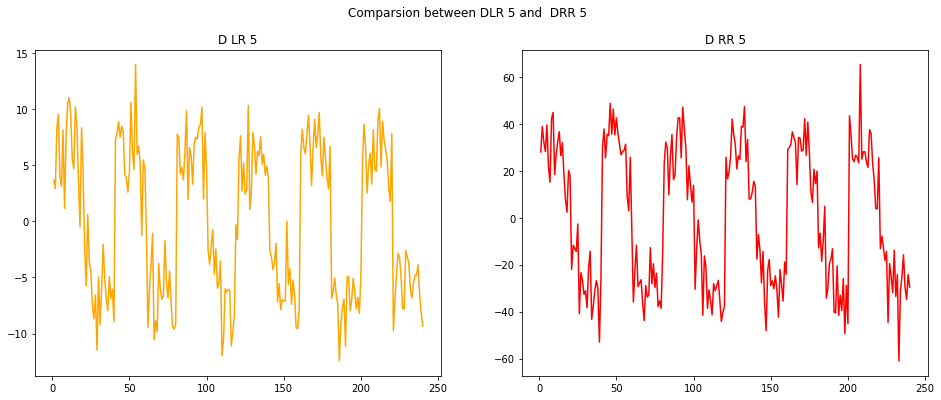

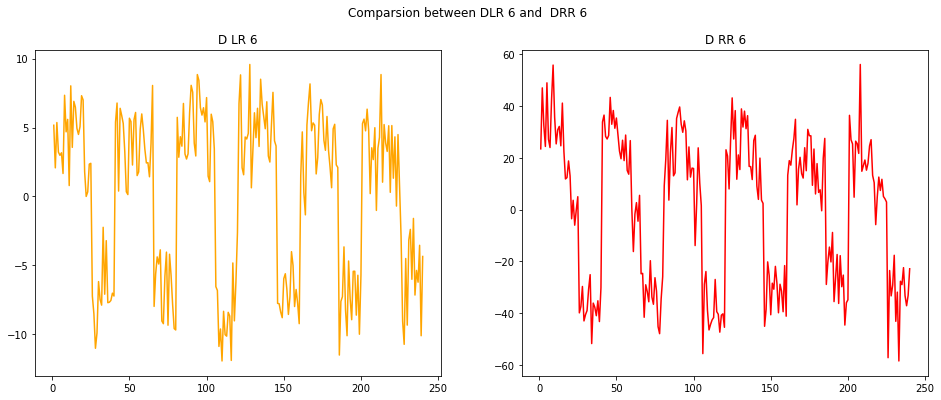

In [108]:
x = [i+1 for i in range(240)]
for i in range(6):
    fig, ax = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between DLR "  +str(i+1) +  " and  DRR " + str(i+1))
    ax[0].plot(x,D_LR[i], color = "orange")
    ax[1].plot(x,D_RR.iloc[:,i],color = "red")
    ax[0].set_title("D LR " + str(i+1))
    ax[1].set_title("D RR " + str(i + 1))
    fig.show()

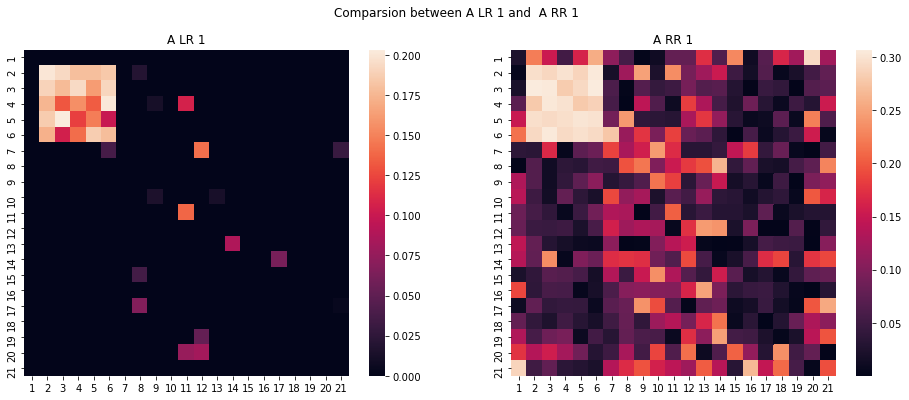

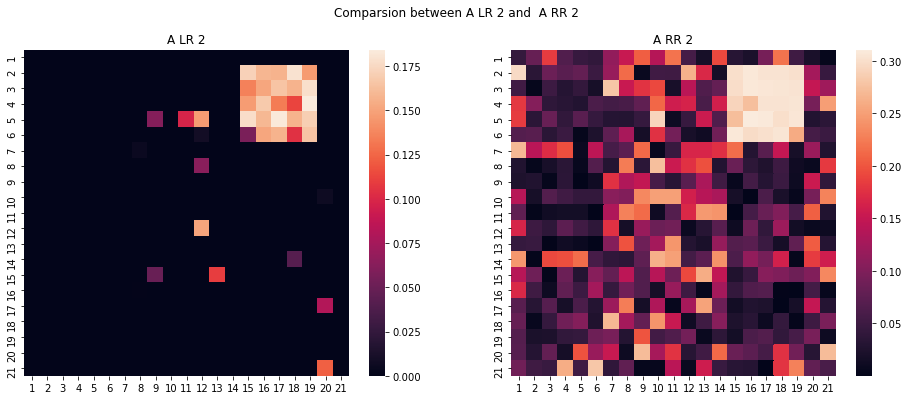

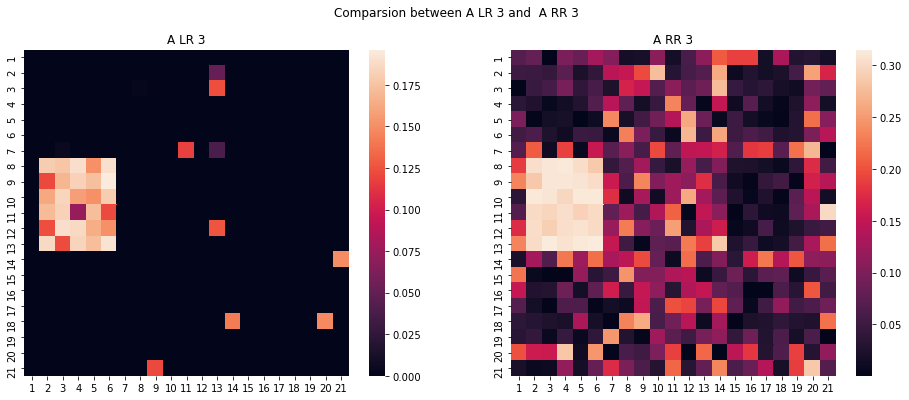

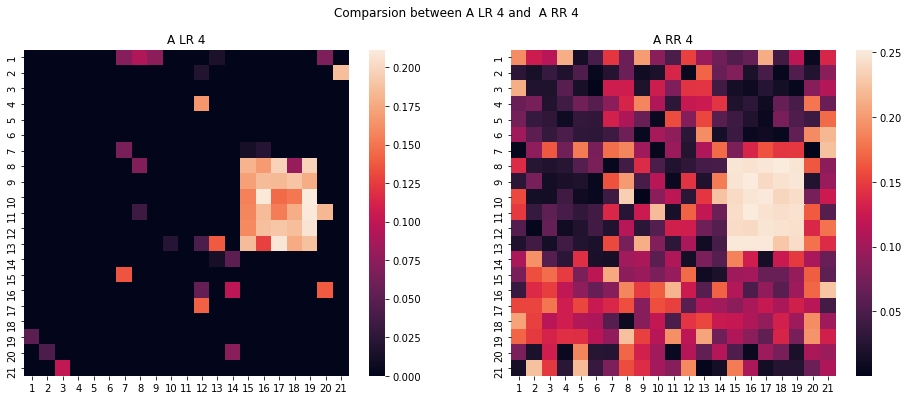

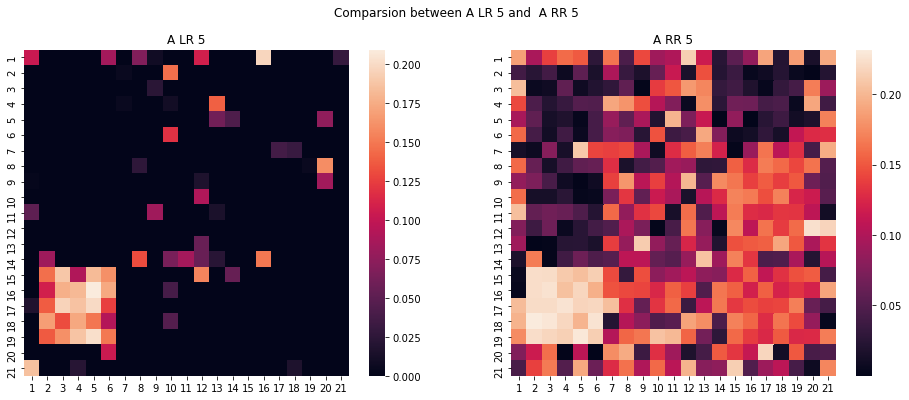

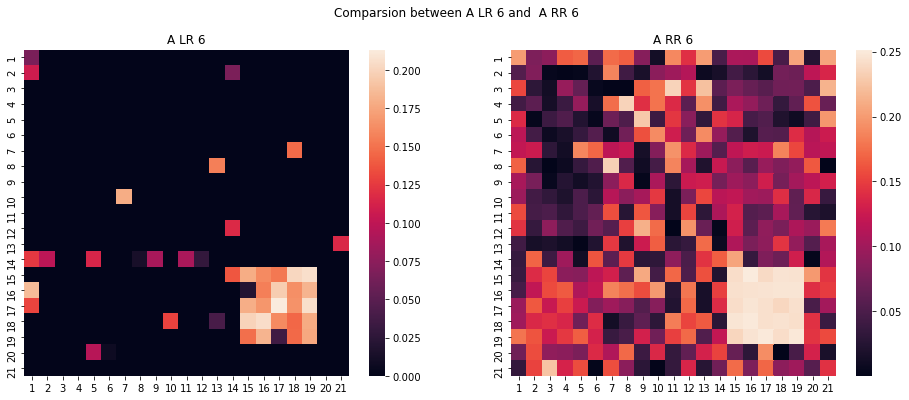

In [109]:
x = [i+1 for i in range(21)]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between A LR "  +str(i+1) +  " and  A RR " + str(i+1))
    sns.heatmap(abs(np.reshape(A_LR[i], (21,21))).transpose(),yticklabels=x,xticklabels=x,ax =ax1)
    sns.heatmap(abs(np.reshape(np.array(A_RR)[i],(21,21))).transpose(),yticklabels = x, xticklabels = x,ax = ax2)
    ax1.set_title("A LR " + str(i+1))
    ax2.set_title("A RR " + str(i + 1))
    fig.show()

### In estimated A_LR, many pixel values are now equal to zero and the retrieved Spatial Map obtained from Lasso Regression are much clearer as the noise data we once added to the X has been filtered out to zero.
### The direct result of this is that the number of false positive has been greatly reduced on the retrieved spatial map.

## 2.5

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
PCs = pca.fit_transform(data_frame_time_courses)

In [111]:
PCs2 =  np.matmul(data_frame_time_courses ,pca.components_.T)
print(PCs2)

            0         1         2         3         4         5
0    1.924545  1.457630 -0.358826 -0.009606 -0.647110 -0.069242
1    1.924545  1.457630 -0.358826 -0.009606 -0.647110 -0.069242
2    1.924545  1.457630 -0.358826 -0.009606 -0.647110 -0.069242
3    1.924545  1.457630 -0.358826 -0.009606 -0.647110 -0.069242
4    1.924545  1.457630 -0.358826 -0.009606 -0.647110 -0.069242
..        ...       ...       ...       ...       ...       ...
235 -1.897424 -0.913523 -0.987179 -0.039427 -0.532694  0.025625
236 -1.897424 -0.913523 -0.987179 -0.039427 -0.532694  0.025625
237 -1.897424 -0.913523 -0.987179 -0.039427 -0.532694  0.025625
238 -1.897424 -0.913523 -0.987179 -0.039427 -0.532694  0.025625
239 -1.897424 -0.913523 -0.987179 -0.039427 -0.532694  0.025625

[240 rows x 6 columns]


In [112]:
for i in range(6):
    print(pca.components_[i])

[ 0.07547725 -0.00182036  0.07644906  0.55928169  0.59912548  0.56276821]
[ 0.65622983 -0.23060954  0.69510789 -0.09419415 -0.14242208  0.06204901]
[ 0.27383063  0.9228611   0.08033206  0.17961053 -0.03861215 -0.18204424]
[-0.69491023  0.15452469  0.70146127 -0.02395617 -0.00205921  0.02440991]
[ 0.02352637  0.26694917 -0.0822161  -0.68756474  0.02130854  0.66949671]
[-0.07230956  0.00189375 -0.07563011  0.41563487 -0.78664821  0.4443873 ]


In [113]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[2.46092846 1.1797447  1.05321103 0.83278942 0.34463671 0.15379429]


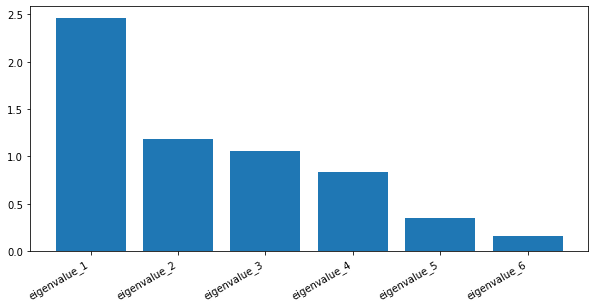

In [114]:
x = ["eigenvalue_1","eigenvalue_2","eigenvalue_3","eigenvalue_4","eigenvalue_5","eigenvalue_6"]
fig = plt.figure(figsize = (10,5))
plt.bar(x,eigenvalues)
fig.autofmt_xdate()

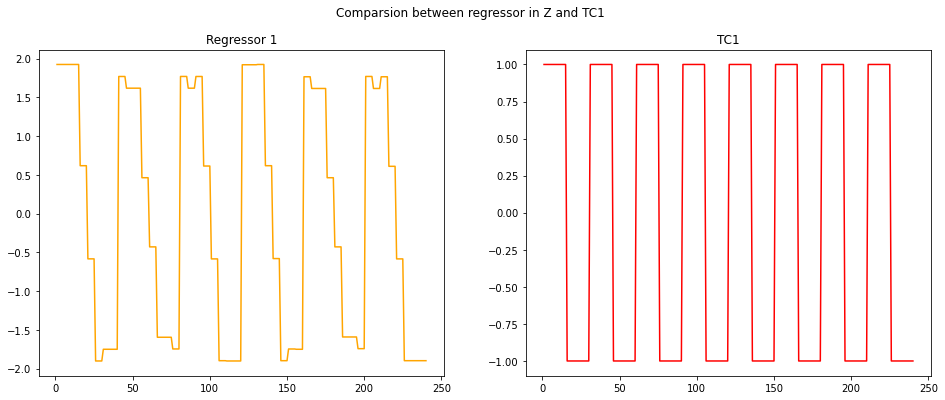

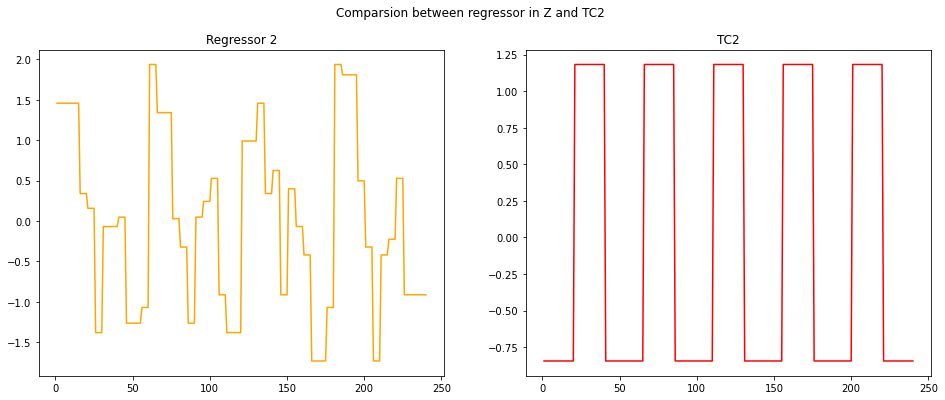

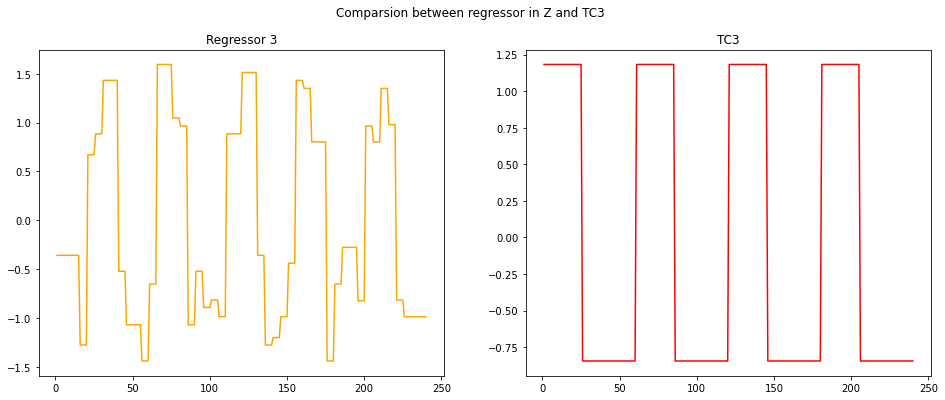

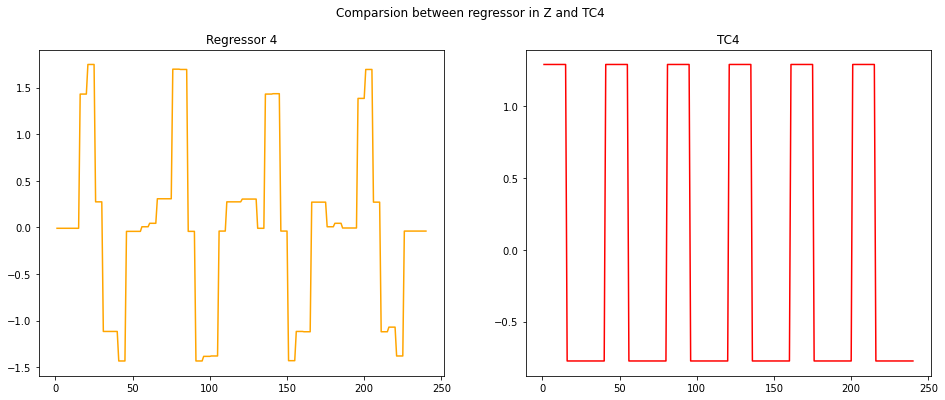

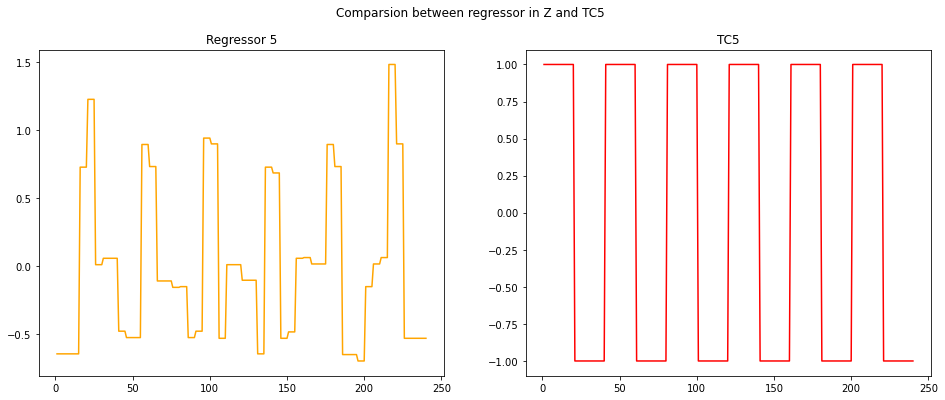

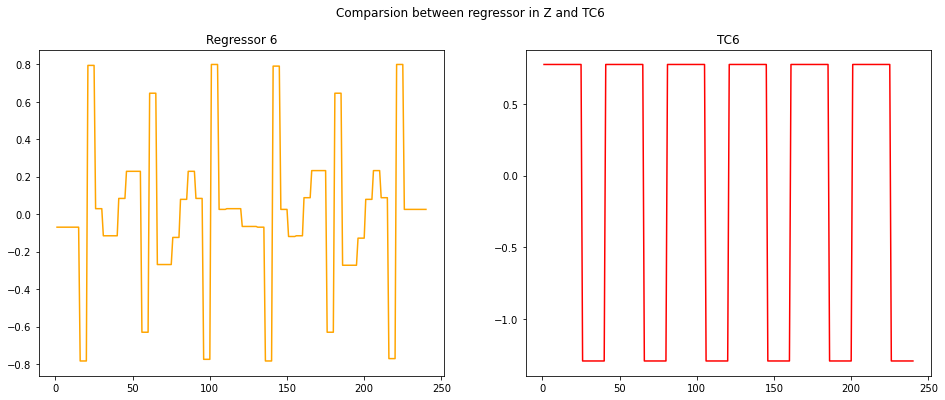

In [115]:
x = [i+1 for i in range(240)]
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
for i in range(6):
    fig, ax = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between regressor in Z and "  + name_list[i])
    ax[0].plot(x,PCs.T[i], color = "orange")
    ax[1].plot(x,data_frame_time_courses.iloc[:,i],color = "red")
    ax[0].set_title("Regressor " + str(i + 1))
    ax[1].set_title(name_list[i])
    fig.show()

In [116]:
clf = linear_model.Lasso(alpha=0.001)
clf.fit(PCs,Standardized_X)
A_PCA = clf.coef_.transpose()
D_PCA = np.matmul(Standardized_X,A_PCA.transpose())

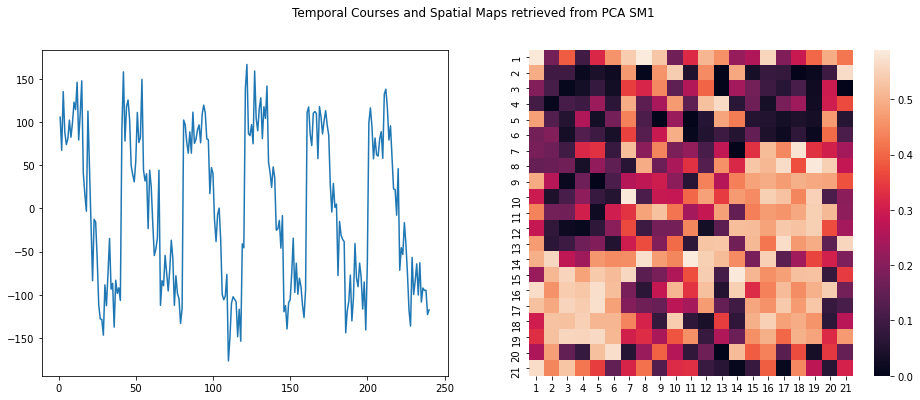

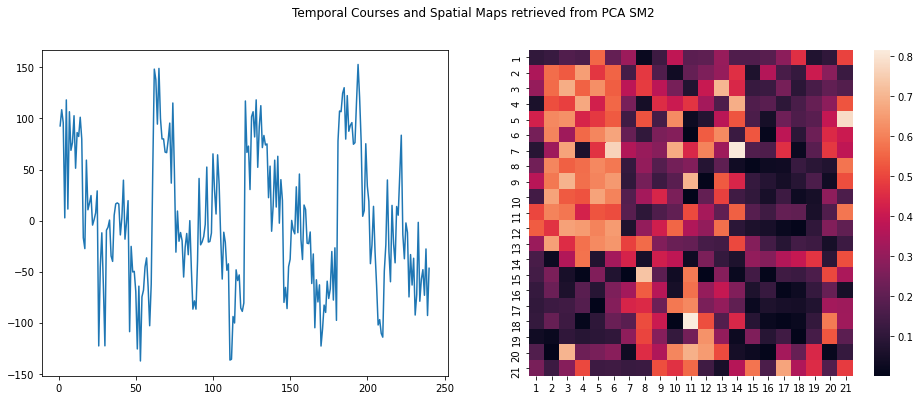

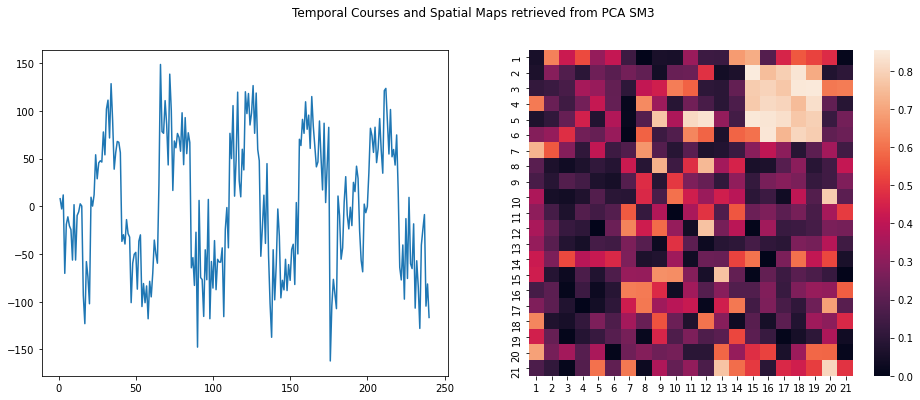

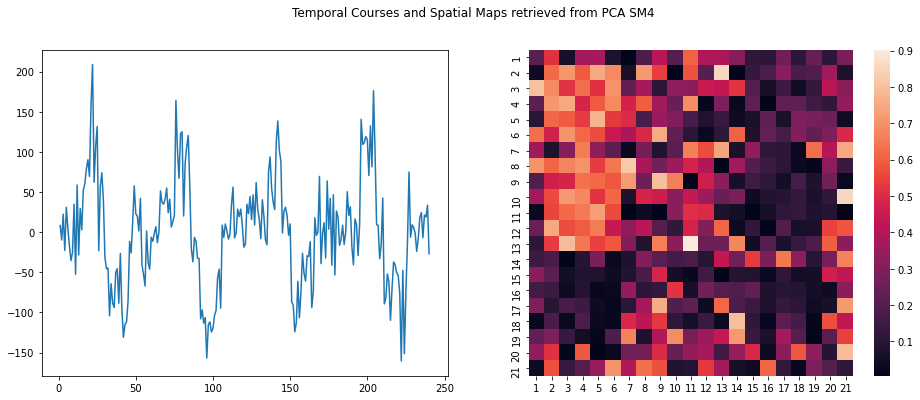

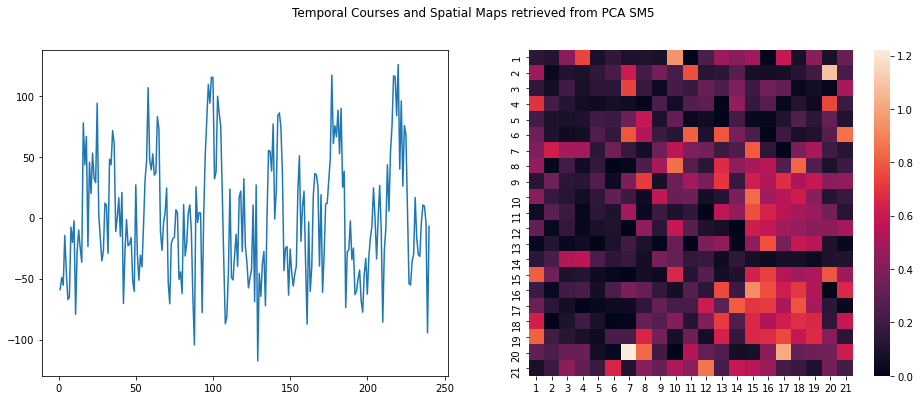

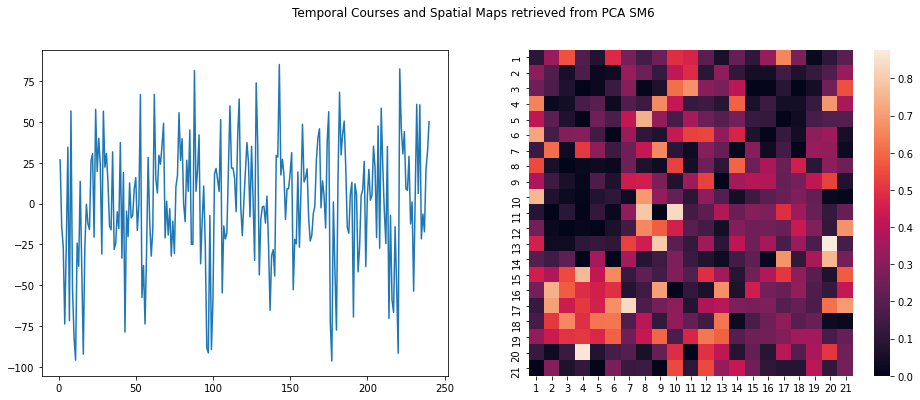

In [117]:
x = [i + 1 for i in range(21)]
x_240 = [i + 1 for i in range(240)]
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    fig.suptitle("Temporal Courses and Spatial Maps retrieved from PCA " + name_list[i])
    ax1.plot(x_240,D_PCA[i])
    sns.heatmap(abs(np.reshape(np.array(A_PCA[i]),(21,21))).transpose(),yticklabels = x, xticklabels = x,ax = ax2)
    fig.show()

### The smallest eigenvalue we here is correspond to the last PC, which has the value of 0.15379429. From the plots of regressors in Z, the shapes of PCs are very distorted and unclear compared to the original TCs.   One possible for this shape lost is due to the procedure of Principle Component Analysis which captures the maximum variation along different TCs, only the components that are the most relevant to conserved in the regressors in Z after PCA.